In [2]:
%cd /home/yierdong/eecs545_proj_new/food-recognition-benchmark-starter-kit

/home/yierdong/eecs545_proj_new/food-recognition-benchmark-starter-kit


In [2]:
import numpy as np
# import pandas as pd
import os
import sys
import json
from pycocotools.coco import COCO

In [3]:
# Reading annotations.json
TRAIN_ANNOTATIONS_PATH = "data/train/new_top50cat_train_filter_no_blur.json"
TRAIN_IMAGE_DIRECTIORY = "data/train/images/"

VAL_ANNOTATIONS_PATH = "data/val/new_top50cat_val_filter_no_blur.json"
VAL_IMAGE_DIRECTIORY = "data/val/images/"

train_coco = COCO(TRAIN_ANNOTATIONS_PATH)

loading annotations into memory...
Done (t=1.04s)
creating index...
index created!


In [4]:
# Reading the annotation files
with open(TRAIN_ANNOTATIONS_PATH) as f:
    train_annotations_data = json.load(f)

with open(VAL_ANNOTATIONS_PATH) as f:
    val_annotations_data = json.load(f)
# train_annotations_data['annotations'][0]

In [5]:
#fix dataset
import numpy as np
import pandas as pd
import cv2
import json
from tqdm import tqdm

In [6]:
# Function for taking a annotation & directiory of images and returning new annoation json with fixed image size info
def fix_data(annotations, directiory, VERBOSE = False):
  for n, i in enumerate((annotations['images'])):
   
      img = cv2.imread(directiory+i["file_name"])
 
      if img.shape[0] != i['height']:
          annotations['images'][n]['height'] = img.shape[0]
          if VERBOSE:
            print(i["file_name"])
            print(annotations['images'][n], img.shape)

      if img.shape[1] != i['width']:
          annotations['images'][n]['width'] = img.shape[1]
          if VERBOSE:
            print(i["file_name"])
            print(annotations['images'][n], img.shape)

  return annotations

train_annotations_data = fix_data(train_annotations_data, TRAIN_IMAGE_DIRECTIORY,True)

with open('./data/train/new_top50cat_train_filter_no_blur.json', 'w') as f:
    json.dump(train_annotations_data, f)

val_annotations_data = fix_data(val_annotations_data, VAL_IMAGE_DIRECTIORY,True)

with open('./data/val/new_top50cat_val_filter_no_blur.json', 'w') as f:
    json.dump(val_annotations_data, f)

008618.jpg
{'id': 8618, 'file_name': '008618.jpg', 'width': 4032, 'height': 4032} (4032, 3024, 3)
008618.jpg
{'id': 8618, 'file_name': '008618.jpg', 'width': 3024, 'height': 4032} (4032, 3024, 3)
008619.jpg
{'id': 8619, 'file_name': '008619.jpg', 'width': 4032, 'height': 4032} (4032, 3024, 3)
008619.jpg
{'id': 8619, 'file_name': '008619.jpg', 'width': 3024, 'height': 4032} (4032, 3024, 3)
008620.jpg
{'id': 8620, 'file_name': '008620.jpg', 'width': 4032, 'height': 4032} (4032, 3024, 3)
008620.jpg
{'id': 8620, 'file_name': '008620.jpg', 'width': 3024, 'height': 4032} (4032, 3024, 3)
008621.jpg
{'id': 8621, 'file_name': '008621.jpg', 'width': 4032, 'height': 4032} (4032, 3024, 3)
008621.jpg
{'id': 8621, 'file_name': '008621.jpg', 'width': 3024, 'height': 4032} (4032, 3024, 3)
008626.jpg
{'id': 8626, 'file_name': '008626.jpg', 'width': 4032, 'height': 4032} (4032, 3024, 3)
008626.jpg
{'id': 8626, 'file_name': '008626.jpg', 'width': 3024, 'height': 4032} (4032, 3024, 3)
008628.jpg
{'id': 86

In [3]:
%cd /home/yierdong/eecs545_proj_new/food-recognition-benchmark-starter-kit/Swin-Transformer-Object-Detection

/home/yierdong/eecs545_proj_new/food-recognition-benchmark-starter-kit/Swin-Transformer-Object-Detection


In [4]:
%run tools/train.py configs/food_recog/config_new_swin_top50_no_blur.py

2022-04-26 07:31:59,745 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.13 (default, Mar 29 2022, 02:18:16) [GCC 7.5.0]
CUDA available: True
GPU 0: Tesla V100-PCIE-16GB
CUDA_HOME: None
GCC: gcc (GCC) 4.8.5 20150623 (Red Hat 4.8.5-44)
PyTorch: 1.9.0+cu102
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.1.2 (Git Hash 98be7e8afa711dc9b66c8ff3504129cb82013cdb)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 10.2
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70
  - CuDNN 7.6.5
  - Magma 2.5.2
  - Build settings: BLAS_INFO=mkl, BUILD_TYPE=Release, CUDA_VERSION=1

loading annotations into memory...
Done (t=1.22s)
creating index...
index created!


2022-04-26 07:32:10,273 - mmdet - INFO - load checkpoint from local path: checkpoints/mask_rcnn_swin_tiny_patch4_window7_1x.pth


Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


2022-04-26 07:32:10,445 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([51, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([51]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([200, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([200]).
size mismatch for roi_head.mask_head.conv_logits.weight: copying a param with shape torch.Size([80, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([50, 256, 1, 1]).
size mismatch for roi_head.mask_head.conv_logi

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0
Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0
Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 4096.0
Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 2048.0


2022-04-26 07:32:25,772 - mmdet - INFO - Epoch [1][50/10810]	lr: 9.890e-06, eta: 11:01:24, time: 0.306, data_time: 0.072, memory: 5873, loss_rpn_cls: 0.0341, loss_rpn_bbox: 0.0131, loss_cls: 4.2306, acc: 0.8203, loss_bbox: 0.1213, loss_mask: 1.1372, loss: 5.5363
2022-04-26 07:32:38,621 - mmdet - INFO - Epoch [1][100/10810]	lr: 1.988e-05, eta: 10:08:09, time: 0.257, data_time: 0.007, memory: 5873, loss_rpn_cls: 0.0231, loss_rpn_bbox: 0.0117, loss_cls: 2.0225, acc: 70.1406, loss_bbox: 0.1354, loss_mask: 0.8831, loss: 3.0759
2022-04-26 07:32:50,837 - mmdet - INFO - Epoch [1][150/10810]	lr: 2.987e-05, eta: 9:41:07, time: 0.244, data_time: 0.007, memory: 5873, loss_rpn_cls: 0.0332, loss_rpn_bbox: 0.0126, loss_cls: 0.6017, acc: 96.4961, loss_bbox: 0.1376, loss_mask: 0.7415, loss: 1.5267
2022-04-26 07:33:03,317 - mmdet - INFO - Epoch [1][200/10810]	lr: 3.986e-05, eta: 9:30:22, time: 0.250, data_time: 0.007, memory: 5873, loss_rpn_cls: 0.0207, loss_rpn_bbox: 0.0131, loss_cls: 0.6204, acc: 96.5

2022-04-26 07:38:49,687 - mmdet - INFO - Epoch [1][1600/10810]	lr: 1.000e-04, eta: 8:52:46, time: 0.249, data_time: 0.007, memory: 5906, loss_rpn_cls: 0.0209, loss_rpn_bbox: 0.0127, loss_cls: 0.2579, acc: 95.2676, loss_bbox: 0.1605, loss_mask: 0.4660, loss: 0.9179
2022-04-26 07:39:02,325 - mmdet - INFO - Epoch [1][1650/10810]	lr: 1.000e-04, eta: 8:52:46, time: 0.253, data_time: 0.007, memory: 5906, loss_rpn_cls: 0.0197, loss_rpn_bbox: 0.0136, loss_cls: 0.2274, acc: 95.6230, loss_bbox: 0.1536, loss_mask: 0.3966, loss: 0.8109
2022-04-26 07:39:14,456 - mmdet - INFO - Epoch [1][1700/10810]	lr: 1.000e-04, eta: 8:52:07, time: 0.243, data_time: 0.007, memory: 5906, loss_rpn_cls: 0.0158, loss_rpn_bbox: 0.0108, loss_cls: 0.2424, acc: 95.2930, loss_bbox: 0.1619, loss_mask: 0.4169, loss: 0.8478
2022-04-26 07:39:26,794 - mmdet - INFO - Epoch [1][1750/10810]	lr: 1.000e-04, eta: 8:51:45, time: 0.247, data_time: 0.007, memory: 5906, loss_rpn_cls: 0.0181, loss_rpn_bbox: 0.0106, loss_cls: 0.2505, acc: 

2022-04-26 07:45:16,392 - mmdet - INFO - Epoch [1][3150/10810]	lr: 1.000e-04, eta: 8:46:18, time: 0.246, data_time: 0.007, memory: 5906, loss_rpn_cls: 0.0174, loss_rpn_bbox: 0.0108, loss_cls: 0.2179, acc: 95.8750, loss_bbox: 0.1395, loss_mask: 0.3779, loss: 0.7636
2022-04-26 07:45:28,571 - mmdet - INFO - Epoch [1][3200/10810]	lr: 1.000e-04, eta: 8:45:53, time: 0.244, data_time: 0.007, memory: 5906, loss_rpn_cls: 0.0114, loss_rpn_bbox: 0.0103, loss_cls: 0.2289, acc: 95.5488, loss_bbox: 0.1548, loss_mask: 0.3791, loss: 0.7845
2022-04-26 07:45:40,909 - mmdet - INFO - Epoch [1][3250/10810]	lr: 1.000e-04, eta: 8:45:36, time: 0.247, data_time: 0.007, memory: 5906, loss_rpn_cls: 0.0127, loss_rpn_bbox: 0.0103, loss_cls: 0.2020, acc: 95.9688, loss_bbox: 0.1375, loss_mask: 0.3286, loss: 0.6910
2022-04-26 07:45:53,215 - mmdet - INFO - Epoch [1][3300/10810]	lr: 1.000e-04, eta: 8:45:17, time: 0.246, data_time: 0.007, memory: 5906, loss_rpn_cls: 0.0121, loss_rpn_bbox: 0.0087, loss_cls: 0.1899, acc: 

2022-04-26 07:51:40,720 - mmdet - INFO - Epoch [1][4700/10810]	lr: 1.000e-04, eta: 8:38:47, time: 0.245, data_time: 0.007, memory: 5906, loss_rpn_cls: 0.0149, loss_rpn_bbox: 0.0096, loss_cls: 0.2175, acc: 95.6289, loss_bbox: 0.1449, loss_mask: 0.3852, loss: 0.7720
2022-04-26 07:51:53,178 - mmdet - INFO - Epoch [1][4750/10810]	lr: 1.000e-04, eta: 8:38:35, time: 0.249, data_time: 0.007, memory: 5906, loss_rpn_cls: 0.0129, loss_rpn_bbox: 0.0126, loss_cls: 0.2060, acc: 95.6328, loss_bbox: 0.1393, loss_mask: 0.3297, loss: 0.7004
2022-04-26 07:52:05,418 - mmdet - INFO - Epoch [1][4800/10810]	lr: 1.000e-04, eta: 8:38:17, time: 0.245, data_time: 0.007, memory: 5906, loss_rpn_cls: 0.0105, loss_rpn_bbox: 0.0095, loss_cls: 0.2217, acc: 95.6211, loss_bbox: 0.1499, loss_mask: 0.3601, loss: 0.7516
2022-04-26 07:52:17,612 - mmdet - INFO - Epoch [1][4850/10810]	lr: 1.000e-04, eta: 8:37:58, time: 0.244, data_time: 0.007, memory: 5906, loss_rpn_cls: 0.0134, loss_rpn_bbox: 0.0091, loss_cls: 0.2178, acc: 

2022-04-26 07:58:07,393 - mmdet - INFO - Epoch [1][6250/10810]	lr: 1.000e-04, eta: 8:32:36, time: 0.251, data_time: 0.007, memory: 5906, loss_rpn_cls: 0.0154, loss_rpn_bbox: 0.0100, loss_cls: 0.2022, acc: 95.7793, loss_bbox: 0.1403, loss_mask: 0.3178, loss: 0.6857
2022-04-26 07:58:20,130 - mmdet - INFO - Epoch [1][6300/10810]	lr: 1.000e-04, eta: 8:32:29, time: 0.255, data_time: 0.008, memory: 5906, loss_rpn_cls: 0.0142, loss_rpn_bbox: 0.0132, loss_cls: 0.2491, acc: 95.4082, loss_bbox: 0.1620, loss_mask: 0.3433, loss: 0.7818
2022-04-26 07:58:32,966 - mmdet - INFO - Epoch [1][6350/10810]	lr: 1.000e-04, eta: 8:32:24, time: 0.257, data_time: 0.007, memory: 5906, loss_rpn_cls: 0.0101, loss_rpn_bbox: 0.0086, loss_cls: 0.2089, acc: 95.6660, loss_bbox: 0.1490, loss_mask: 0.3527, loss: 0.7294
2022-04-26 07:58:45,499 - mmdet - INFO - Epoch [1][6400/10810]	lr: 1.000e-04, eta: 8:32:13, time: 0.251, data_time: 0.007, memory: 5906, loss_rpn_cls: 0.0131, loss_rpn_bbox: 0.0109, loss_cls: 0.2033, acc: 

2022-04-26 08:04:35,992 - mmdet - INFO - Epoch [1][7800/10810]	lr: 1.000e-04, eta: 8:26:49, time: 0.258, data_time: 0.007, memory: 5927, loss_rpn_cls: 0.0132, loss_rpn_bbox: 0.0112, loss_cls: 0.2408, acc: 95.4531, loss_bbox: 0.1579, loss_mask: 0.3385, loss: 0.7616
2022-04-26 08:04:48,525 - mmdet - INFO - Epoch [1][7850/10810]	lr: 1.000e-04, eta: 8:26:37, time: 0.251, data_time: 0.009, memory: 5927, loss_rpn_cls: 0.0153, loss_rpn_bbox: 0.0097, loss_cls: 0.2155, acc: 95.3574, loss_bbox: 0.1555, loss_mask: 0.3164, loss: 0.7124
2022-04-26 08:05:01,197 - mmdet - INFO - Epoch [1][7900/10810]	lr: 1.000e-04, eta: 8:26:28, time: 0.253, data_time: 0.007, memory: 5927, loss_rpn_cls: 0.0164, loss_rpn_bbox: 0.0114, loss_cls: 0.2153, acc: 95.4844, loss_bbox: 0.1505, loss_mask: 0.3619, loss: 0.7554
2022-04-26 08:05:13,850 - mmdet - INFO - Epoch [1][7950/10810]	lr: 1.000e-04, eta: 8:26:18, time: 0.253, data_time: 0.008, memory: 5927, loss_rpn_cls: 0.0144, loss_rpn_bbox: 0.0100, loss_cls: 0.2074, acc: 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 08:06:28,921 - mmdet - INFO - Epoch [1][8250/10810]	lr: 1.000e-04, eta: 8:25:07, time: 0.247, data_time: 0.007, memory: 5927, loss_rpn_cls: 0.0120, loss_rpn_bbox: 0.0091, loss_cls: 0.1925, acc: 95.8789, loss_bbox: 0.1368, loss_mask: 0.3426, loss: 0.6930
2022-04-26 08:06:41,877 - mmdet - INFO - Epoch [1][8300/10810]	lr: 1.000e-04, eta: 8:25:01, time: 0.259, data_time: 0.009, memory: 5927, loss_rpn_cls: 0.0146, loss_rpn_bbox: 0.0126, loss_cls: 0.2164, acc: 95.3750, loss_bbox: 0.1559, loss_mask: 0.3025, loss: 0.7019
2022-04-26 08:06:54,340 - mmdet - INFO - Epoch [1][8350/10810]	lr: 1.000e-04, eta: 8:24:48, time: 0.249, data_time: 0.008, memory: 5927, loss_rpn_cls: 0.0149, loss_rpn_bbox: 0.0110, loss_cls: 0.2120, acc: 95.8438, loss_bbox: 0.1534, loss_mask: 0.3265, loss: 0.7177
2022-04-26 08:07:06,930 - mmdet - INFO - Epoch [1][8400/10810]	lr: 1.000e-04, eta: 8:24:38, time: 0.252, data_time: 0.008, memory: 5927, loss_rpn_cls: 0.0135, loss_rpn_bbox: 0.0097, loss_cls: 0.1935, acc: 

2022-04-26 08:12:54,945 - mmdet - INFO - Epoch [1][9800/10810]	lr: 1.000e-04, eta: 8:18:31, time: 0.247, data_time: 0.007, memory: 6026, loss_rpn_cls: 0.0149, loss_rpn_bbox: 0.0106, loss_cls: 0.2242, acc: 95.6836, loss_bbox: 0.1487, loss_mask: 0.3456, loss: 0.7440
2022-04-26 08:13:07,449 - mmdet - INFO - Epoch [1][9850/10810]	lr: 1.000e-04, eta: 8:18:19, time: 0.250, data_time: 0.007, memory: 6026, loss_rpn_cls: 0.0151, loss_rpn_bbox: 0.0099, loss_cls: 0.2077, acc: 95.6270, loss_bbox: 0.1486, loss_mask: 0.3171, loss: 0.6984
2022-04-26 08:13:20,188 - mmdet - INFO - Epoch [1][9900/10810]	lr: 1.000e-04, eta: 8:18:10, time: 0.255, data_time: 0.007, memory: 6026, loss_rpn_cls: 0.0117, loss_rpn_bbox: 0.0103, loss_cls: 0.2349, acc: 95.3438, loss_bbox: 0.1611, loss_mask: 0.3608, loss: 0.7788
2022-04-26 08:13:32,455 - mmdet - INFO - Epoch [1][9950/10810]	lr: 1.000e-04, eta: 8:17:55, time: 0.245, data_time: 0.007, memory: 6026, loss_rpn_cls: 0.0171, loss_rpn_bbox: 0.0124, loss_cls: 0.2102, acc: 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 08:15:37,849 - mmdet - INFO - Epoch [1][10450/10810]	lr: 1.000e-04, eta: 8:15:58, time: 0.248, data_time: 0.007, memory: 6026, loss_rpn_cls: 0.0142, loss_rpn_bbox: 0.0125, loss_cls: 0.2061, acc: 95.5898, loss_bbox: 0.1461, loss_mask: 0.3313, loss: 0.7101
2022-04-26 08:15:50,379 - mmdet - INFO - Epoch [1][10500/10810]	lr: 1.000e-04, eta: 8:15:46, time: 0.251, data_time: 0.007, memory: 6026, loss_rpn_cls: 0.0104, loss_rpn_bbox: 0.0101, loss_cls: 0.2068, acc: 95.9062, loss_bbox: 0.1456, loss_mask: 0.3015, loss: 0.6744
2022-04-26 08:16:02,524 - mmdet - INFO - Epoch [1][10550/10810]	lr: 1.000e-04, eta: 8:15:30, time: 0.243, data_time: 0.007, memory: 6026, loss_rpn_cls: 0.0108, loss_rpn_bbox: 0.0093, loss_cls: 0.1874, acc: 95.8125, loss_bbox: 0.1382, loss_mask: 0.3226, loss: 0.6684
2022-04-26 08:16:14,675 - mmdet - INFO - Epoch [1][10600/10810]	lr: 1.000e-04, eta: 8:15:14, time: 0.243, data_time: 0.007, memory: 6026, loss_rpn_cls: 0.0111, loss_rpn_bbox: 0.0095, loss_cls: 0.2051, a

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 507/507, 13.6 task/s, elapsed: 37s, ETA:     0s

2022-04-26 08:17:50,576 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.12s).
Accumulating evaluation results...


2022-04-26 08:17:52,125 - mmdet - INFO - Evaluating segm...


DONE (t=0.41s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.083
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.205
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.046
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.034
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.091
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.187
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.187
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.187
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.037
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.206
Loading and preparing resul

2022-04-26 08:17:53,790 - mmdet - INFO - Exp name: config_new_swin_top50.py
2022-04-26 08:17:53,791 - mmdet - INFO - Epoch(val) [1][10810]	bbox_mAP: 0.0830, bbox_mAP_50: 0.2050, bbox_mAP_75: 0.0460, bbox_mAP_s: 0.0000, bbox_mAP_m: 0.0340, bbox_mAP_l: 0.0910, bbox_mAP_copypaste: 0.083 0.205 0.046 0.000 0.034 0.091, segm_mAP: 0.1110, segm_mAP_50: 0.2130, segm_mAP_75: 0.1080, segm_mAP_s: 0.0000, segm_mAP_m: 0.0080, segm_mAP_l: 0.1190, segm_mAP_copypaste: 0.111 0.213 0.108 0.000 0.008 0.119


DONE (t=0.41s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.111
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.213
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.108
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.008
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.119
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.235
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.235
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.235
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.015
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.254


2022-04-26 08:18:08,943 - mmdet - INFO - Epoch [2][50/10810]	lr: 1.000e-04, eta: 8:14:05, time: 0.303, data_time: 0.055, memory: 6026, loss_rpn_cls: 0.0110, loss_rpn_bbox: 0.0097, loss_cls: 0.2085, acc: 95.4102, loss_bbox: 0.1567, loss_mask: 0.3392, loss: 0.7251
2022-04-26 08:18:21,511 - mmdet - INFO - Epoch [2][100/10810]	lr: 1.000e-04, eta: 8:13:54, time: 0.251, data_time: 0.007, memory: 6026, loss_rpn_cls: 0.0139, loss_rpn_bbox: 0.0089, loss_cls: 0.1857, acc: 96.1152, loss_bbox: 0.1346, loss_mask: 0.3434, loss: 0.6865
2022-04-26 08:18:34,175 - mmdet - INFO - Epoch [2][150/10810]	lr: 1.000e-04, eta: 8:13:43, time: 0.253, data_time: 0.007, memory: 6026, loss_rpn_cls: 0.0122, loss_rpn_bbox: 0.0120, loss_cls: 0.2053, acc: 95.6543, loss_bbox: 0.1470, loss_mask: 0.3065, loss: 0.6829
2022-04-26 08:18:46,359 - mmdet - INFO - Epoch [2][200/10810]	lr: 1.000e-04, eta: 8:13:28, time: 0.244, data_time: 0.007, memory: 6026, loss_rpn_cls: 0.0135, loss_rpn_bbox: 0.0108, loss_cls: 0.2024, acc: 95.62

2022-04-26 08:24:35,922 - mmdet - INFO - Epoch [2][1600/10810]	lr: 1.000e-04, eta: 8:07:42, time: 0.249, data_time: 0.007, memory: 6026, loss_rpn_cls: 0.0102, loss_rpn_bbox: 0.0087, loss_cls: 0.2267, acc: 95.0664, loss_bbox: 0.1624, loss_mask: 0.3243, loss: 0.7323
2022-04-26 08:24:48,312 - mmdet - INFO - Epoch [2][1650/10810]	lr: 1.000e-04, eta: 8:07:29, time: 0.248, data_time: 0.007, memory: 6026, loss_rpn_cls: 0.0147, loss_rpn_bbox: 0.0095, loss_cls: 0.2207, acc: 95.3848, loss_bbox: 0.1552, loss_mask: 0.3105, loss: 0.7105
2022-04-26 08:25:00,783 - mmdet - INFO - Epoch [2][1700/10810]	lr: 1.000e-04, eta: 8:07:16, time: 0.249, data_time: 0.007, memory: 6026, loss_rpn_cls: 0.0199, loss_rpn_bbox: 0.0113, loss_cls: 0.2153, acc: 95.2988, loss_bbox: 0.1465, loss_mask: 0.2876, loss: 0.6806
2022-04-26 08:25:12,881 - mmdet - INFO - Epoch [2][1750/10810]	lr: 1.000e-04, eta: 8:07:00, time: 0.242, data_time: 0.007, memory: 6026, loss_rpn_cls: 0.0117, loss_rpn_bbox: 0.0104, loss_cls: 0.1932, acc: 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 08:28:46,067 - mmdet - INFO - Epoch [2][2600/10810]	lr: 1.000e-04, eta: 8:03:38, time: 0.248, data_time: 0.007, memory: 6026, loss_rpn_cls: 0.0093, loss_rpn_bbox: 0.0084, loss_cls: 0.1899, acc: 96.0039, loss_bbox: 0.1421, loss_mask: 0.3140, loss: 0.6637
2022-04-26 08:28:58,676 - mmdet - INFO - Epoch [2][2650/10810]	lr: 1.000e-04, eta: 8:03:27, time: 0.252, data_time: 0.007, memory: 6026, loss_rpn_cls: 0.0107, loss_rpn_bbox: 0.0107, loss_cls: 0.2018, acc: 95.5254, loss_bbox: 0.1517, loss_mask: 0.2945, loss: 0.6692
2022-04-26 08:29:10,973 - mmdet - INFO - Epoch [2][2700/10810]	lr: 1.000e-04, eta: 8:03:13, time: 0.246, data_time: 0.007, memory: 6026, loss_rpn_cls: 0.0102, loss_rpn_bbox: 0.0086, loss_cls: 0.2091, acc: 95.3867, loss_bbox: 0.1462, loss_mask: 0.3154, loss: 0.6895
2022-04-26 08:29:24,186 - mmdet - INFO - Epoch [2][2750/10810]	lr: 1.000e-04, eta: 8:03:07, time: 0.264, data_time: 0.008, memory: 6026, loss_rpn_cls: 0.0124, loss_rpn_bbox: 0.0111, loss_cls: 0.2096, acc: 

2022-04-26 08:35:15,772 - mmdet - INFO - Epoch [2][4150/10810]	lr: 1.000e-04, eta: 7:57:35, time: 0.250, data_time: 0.008, memory: 6552, loss_rpn_cls: 0.0161, loss_rpn_bbox: 0.0095, loss_cls: 0.1991, acc: 95.7461, loss_bbox: 0.1414, loss_mask: 0.2694, loss: 0.6355
2022-04-26 08:35:28,688 - mmdet - INFO - Epoch [2][4200/10810]	lr: 1.000e-04, eta: 7:57:25, time: 0.258, data_time: 0.007, memory: 6552, loss_rpn_cls: 0.0131, loss_rpn_bbox: 0.0094, loss_cls: 0.1989, acc: 95.7031, loss_bbox: 0.1384, loss_mask: 0.2929, loss: 0.6526
2022-04-26 08:35:41,181 - mmdet - INFO - Epoch [2][4250/10810]	lr: 1.000e-04, eta: 7:57:13, time: 0.250, data_time: 0.007, memory: 6552, loss_rpn_cls: 0.0089, loss_rpn_bbox: 0.0089, loss_cls: 0.2049, acc: 95.4961, loss_bbox: 0.1480, loss_mask: 0.3492, loss: 0.7198
2022-04-26 08:35:53,828 - mmdet - INFO - Epoch [2][4300/10810]	lr: 1.000e-04, eta: 7:57:02, time: 0.253, data_time: 0.008, memory: 6552, loss_rpn_cls: 0.0236, loss_rpn_bbox: 0.0156, loss_cls: 0.2191, acc: 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 08:38:00,311 - mmdet - INFO - Epoch [2][4800/10810]	lr: 1.000e-04, eta: 7:55:09, time: 0.250, data_time: 0.008, memory: 6552, loss_rpn_cls: 0.0107, loss_rpn_bbox: 0.0098, loss_cls: 0.2074, acc: 95.5781, loss_bbox: 0.1523, loss_mask: 0.3092, loss: 0.6895
2022-04-26 08:38:12,544 - mmdet - INFO - Epoch [2][4850/10810]	lr: 1.000e-04, eta: 7:54:54, time: 0.245, data_time: 0.007, memory: 6552, loss_rpn_cls: 0.0104, loss_rpn_bbox: 0.0085, loss_cls: 0.2033, acc: 95.7422, loss_bbox: 0.1384, loss_mask: 0.2770, loss: 0.6376
2022-04-26 08:38:24,858 - mmdet - INFO - Epoch [2][4900/10810]	lr: 1.000e-04, eta: 7:54:40, time: 0.246, data_time: 0.007, memory: 6552, loss_rpn_cls: 0.0111, loss_rpn_bbox: 0.0092, loss_cls: 0.2127, acc: 95.4180, loss_bbox: 0.1526, loss_mask: 0.2952, loss: 0.6808
2022-04-26 08:38:37,489 - mmdet - INFO - Epoch [2][4950/10810]	lr: 1.000e-04, eta: 7:54:29, time: 0.253, data_time: 0.007, memory: 6552, loss_rpn_cls: 0.0104, loss_rpn_bbox: 0.0090, loss_cls: 0.2163, acc: 

2022-04-26 08:44:29,605 - mmdet - INFO - Epoch [2][6350/10810]	lr: 1.000e-04, eta: 7:48:55, time: 0.249, data_time: 0.008, memory: 6552, loss_rpn_cls: 0.0124, loss_rpn_bbox: 0.0100, loss_cls: 0.1773, acc: 96.0293, loss_bbox: 0.1326, loss_mask: 0.2958, loss: 0.6281
2022-04-26 08:44:42,178 - mmdet - INFO - Epoch [2][6400/10810]	lr: 1.000e-04, eta: 7:48:43, time: 0.251, data_time: 0.007, memory: 6552, loss_rpn_cls: 0.0106, loss_rpn_bbox: 0.0094, loss_cls: 0.1825, acc: 95.8711, loss_bbox: 0.1369, loss_mask: 0.2989, loss: 0.6384
2022-04-26 08:44:54,733 - mmdet - INFO - Epoch [2][6450/10810]	lr: 1.000e-04, eta: 7:48:31, time: 0.251, data_time: 0.007, memory: 6552, loss_rpn_cls: 0.0103, loss_rpn_bbox: 0.0074, loss_cls: 0.1760, acc: 96.0977, loss_bbox: 0.1331, loss_mask: 0.3054, loss: 0.6322
2022-04-26 08:45:07,046 - mmdet - INFO - Epoch [2][6500/10810]	lr: 1.000e-04, eta: 7:48:17, time: 0.246, data_time: 0.007, memory: 6552, loss_rpn_cls: 0.0112, loss_rpn_bbox: 0.0095, loss_cls: 0.2081, acc: 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 08:48:03,646 - mmdet - INFO - Epoch [2][7200/10810]	lr: 1.000e-04, eta: 7:45:32, time: 0.250, data_time: 0.009, memory: 6552, loss_rpn_cls: 0.0160, loss_rpn_bbox: 0.0120, loss_cls: 0.2115, acc: 95.2695, loss_bbox: 0.1575, loss_mask: 0.2721, loss: 0.6691
2022-04-26 08:48:16,182 - mmdet - INFO - Epoch [2][7250/10810]	lr: 1.000e-04, eta: 7:45:20, time: 0.251, data_time: 0.007, memory: 6552, loss_rpn_cls: 0.0147, loss_rpn_bbox: 0.0103, loss_cls: 0.1802, acc: 95.7344, loss_bbox: 0.1434, loss_mask: 0.2818, loss: 0.6304
2022-04-26 08:48:28,851 - mmdet - INFO - Epoch [2][7300/10810]	lr: 1.000e-04, eta: 7:45:08, time: 0.253, data_time: 0.008, memory: 6552, loss_rpn_cls: 0.0107, loss_rpn_bbox: 0.0093, loss_cls: 0.1901, acc: 95.7871, loss_bbox: 0.1380, loss_mask: 0.3528, loss: 0.7010
2022-04-26 08:48:41,445 - mmdet - INFO - Epoch [2][7350/10810]	lr: 1.000e-04, eta: 7:44:56, time: 0.252, data_time: 0.007, memory: 6552, loss_rpn_cls: 0.0131, loss_rpn_bbox: 0.0097, loss_cls: 0.2031, acc: 

2022-04-26 08:54:33,861 - mmdet - INFO - Epoch [2][8750/10810]	lr: 1.000e-04, eta: 7:39:19, time: 0.246, data_time: 0.008, memory: 6552, loss_rpn_cls: 0.0111, loss_rpn_bbox: 0.0107, loss_cls: 0.2016, acc: 95.7676, loss_bbox: 0.1463, loss_mask: 0.3261, loss: 0.6957
2022-04-26 08:54:46,388 - mmdet - INFO - Epoch [2][8800/10810]	lr: 1.000e-04, eta: 7:39:07, time: 0.251, data_time: 0.007, memory: 6552, loss_rpn_cls: 0.0163, loss_rpn_bbox: 0.0108, loss_cls: 0.2142, acc: 95.5586, loss_bbox: 0.1501, loss_mask: 0.3393, loss: 0.7308
2022-04-26 08:54:59,119 - mmdet - INFO - Epoch [2][8850/10810]	lr: 1.000e-04, eta: 7:38:56, time: 0.255, data_time: 0.008, memory: 6552, loss_rpn_cls: 0.0120, loss_rpn_bbox: 0.0118, loss_cls: 0.2121, acc: 95.5059, loss_bbox: 0.1542, loss_mask: 0.3108, loss: 0.7008
2022-04-26 08:55:11,300 - mmdet - INFO - Epoch [2][8900/10810]	lr: 1.000e-04, eta: 7:38:41, time: 0.244, data_time: 0.007, memory: 6552, loss_rpn_cls: 0.0154, loss_rpn_bbox: 0.0102, loss_cls: 0.1975, acc: 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 08:56:26,540 - mmdet - INFO - Epoch [2][9200/10810]	lr: 1.000e-04, eta: 7:37:27, time: 0.248, data_time: 0.009, memory: 6552, loss_rpn_cls: 0.0183, loss_rpn_bbox: 0.0126, loss_cls: 0.2188, acc: 95.2148, loss_bbox: 0.1561, loss_mask: 0.3264, loss: 0.7322
2022-04-26 08:56:38,928 - mmdet - INFO - Epoch [2][9250/10810]	lr: 1.000e-04, eta: 7:37:14, time: 0.248, data_time: 0.007, memory: 6552, loss_rpn_cls: 0.0111, loss_rpn_bbox: 0.0101, loss_cls: 0.1894, acc: 96.0098, loss_bbox: 0.1342, loss_mask: 0.3205, loss: 0.6652
2022-04-26 08:56:51,559 - mmdet - INFO - Epoch [2][9300/10810]	lr: 1.000e-04, eta: 7:37:02, time: 0.253, data_time: 0.008, memory: 6552, loss_rpn_cls: 0.0135, loss_rpn_bbox: 0.0096, loss_cls: 0.1871, acc: 95.9141, loss_bbox: 0.1401, loss_mask: 0.2647, loss: 0.6150
2022-04-26 08:57:03,949 - mmdet - INFO - Epoch [2][9350/10810]	lr: 1.000e-04, eta: 7:36:49, time: 0.248, data_time: 0.007, memory: 6552, loss_rpn_cls: 0.0111, loss_rpn_bbox: 0.0088, loss_cls: 0.1990, acc: 

2022-04-26 09:02:55,813 - mmdet - INFO - Epoch [2][10750/10810]	lr: 1.000e-04, eta: 7:31:07, time: 0.248, data_time: 0.007, memory: 6552, loss_rpn_cls: 0.0123, loss_rpn_bbox: 0.0092, loss_cls: 0.2079, acc: 95.4941, loss_bbox: 0.1529, loss_mask: 0.2870, loss: 0.6692
2022-04-26 09:03:08,287 - mmdet - INFO - Epoch [2][10800/10810]	lr: 1.000e-04, eta: 7:30:54, time: 0.249, data_time: 0.008, memory: 6552, loss_rpn_cls: 0.0108, loss_rpn_bbox: 0.0117, loss_cls: 0.1804, acc: 95.7422, loss_bbox: 0.1417, loss_mask: 0.3076, loss: 0.6522
2022-04-26 09:03:10,913 - mmdet - INFO - Saving checkpoint at 2 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 507/507, 12.8 task/s, elapsed: 40s, ETA:     0s

2022-04-26 09:03:56,889 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.17s).
Accumulating evaluation results...


2022-04-26 09:03:58,526 - mmdet - INFO - Evaluating segm...


DONE (t=0.44s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.096
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.231
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.063
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.035
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.103
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.228
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.228
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.228
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.035
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.252
Loading and preparing resul

2022-04-26 09:03:59,855 - mmdet - INFO - Exp name: config_new_swin_top50.py
2022-04-26 09:03:59,855 - mmdet - INFO - Epoch(val) [2][10810]	bbox_mAP: 0.0960, bbox_mAP_50: 0.2310, bbox_mAP_75: 0.0630, bbox_mAP_s: 0.0000, bbox_mAP_m: 0.0350, bbox_mAP_l: 0.1030, bbox_mAP_copypaste: 0.096 0.231 0.063 0.000 0.035 0.103, segm_mAP: 0.1500, segm_mAP_50: 0.2610, segm_mAP_75: 0.1650, segm_mAP_s: 0.0000, segm_mAP_m: 0.0670, segm_mAP_l: 0.1620, segm_mAP_copypaste: 0.150 0.261 0.165 0.000 0.067 0.162


DONE (t=0.45s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.150
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.261
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.165
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.067
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.162
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.299
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.299
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.299
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.069
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.325


2022-04-26 09:04:15,084 - mmdet - INFO - Epoch [3][50/10810]	lr: 1.000e-04, eta: 7:30:40, time: 0.304, data_time: 0.054, memory: 6552, loss_rpn_cls: 0.0121, loss_rpn_bbox: 0.0118, loss_cls: 0.2168, acc: 95.3750, loss_bbox: 0.1544, loss_mask: 0.3287, loss: 0.7238
2022-04-26 09:04:28,124 - mmdet - INFO - Epoch [3][100/10810]	lr: 1.000e-04, eta: 7:30:30, time: 0.261, data_time: 0.007, memory: 6552, loss_rpn_cls: 0.0132, loss_rpn_bbox: 0.0110, loss_cls: 0.2087, acc: 95.5000, loss_bbox: 0.1511, loss_mask: 0.2749, loss: 0.6589
2022-04-26 09:04:40,686 - mmdet - INFO - Epoch [3][150/10810]	lr: 1.000e-04, eta: 7:30:18, time: 0.251, data_time: 0.007, memory: 6552, loss_rpn_cls: 0.0117, loss_rpn_bbox: 0.0114, loss_cls: 0.2042, acc: 95.2109, loss_bbox: 0.1592, loss_mask: 0.2666, loss: 0.6530
2022-04-26 09:04:53,355 - mmdet - INFO - Epoch [3][200/10810]	lr: 1.000e-04, eta: 7:30:06, time: 0.253, data_time: 0.007, memory: 6552, loss_rpn_cls: 0.0185, loss_rpn_bbox: 0.0112, loss_cls: 0.1974, acc: 95.59

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 09:06:46,219 - mmdet - INFO - Epoch [3][650/10810]	lr: 1.000e-04, eta: 7:28:15, time: 0.255, data_time: 0.011, memory: 6552, loss_rpn_cls: 0.0119, loss_rpn_bbox: 0.0092, loss_cls: 0.1784, acc: 96.1602, loss_bbox: 0.1309, loss_mask: 0.3147, loss: 0.6450
2022-04-26 09:06:58,540 - mmdet - INFO - Epoch [3][700/10810]	lr: 1.000e-04, eta: 7:28:01, time: 0.246, data_time: 0.007, memory: 6552, loss_rpn_cls: 0.0110, loss_rpn_bbox: 0.0110, loss_cls: 0.2013, acc: 95.7793, loss_bbox: 0.1444, loss_mask: 0.3141, loss: 0.6818
2022-04-26 09:07:10,882 - mmdet - INFO - Epoch [3][750/10810]	lr: 1.000e-04, eta: 7:27:48, time: 0.247, data_time: 0.007, memory: 6552, loss_rpn_cls: 0.0081, loss_rpn_bbox: 0.0084, loss_cls: 0.1862, acc: 95.9160, loss_bbox: 0.1390, loss_mask: 0.3243, loss: 0.6660
2022-04-26 09:07:23,163 - mmdet - INFO - Epoch [3][800/10810]	lr: 1.000e-04, eta: 7:27:34, time: 0.246, data_time: 0.007, memory: 6552, loss_rpn_cls: 0.0169, loss_rpn_bbox: 0.0103, loss_cls: 0.2061, acc: 95.3

2022-04-26 09:13:13,692 - mmdet - INFO - Epoch [3][2200/10810]	lr: 1.000e-04, eta: 7:21:44, time: 0.253, data_time: 0.008, memory: 6552, loss_rpn_cls: 0.0135, loss_rpn_bbox: 0.0091, loss_cls: 0.2055, acc: 95.5293, loss_bbox: 0.1542, loss_mask: 0.2703, loss: 0.6527
2022-04-26 09:13:26,293 - mmdet - INFO - Epoch [3][2250/10810]	lr: 1.000e-04, eta: 7:21:32, time: 0.252, data_time: 0.008, memory: 6552, loss_rpn_cls: 0.0104, loss_rpn_bbox: 0.0093, loss_cls: 0.1974, acc: 95.5762, loss_bbox: 0.1442, loss_mask: 0.3666, loss: 0.7279
2022-04-26 09:13:38,941 - mmdet - INFO - Epoch [3][2300/10810]	lr: 1.000e-04, eta: 7:21:20, time: 0.253, data_time: 0.007, memory: 6552, loss_rpn_cls: 0.0085, loss_rpn_bbox: 0.0085, loss_cls: 0.1990, acc: 95.5215, loss_bbox: 0.1452, loss_mask: 0.2758, loss: 0.6369
2022-04-26 09:13:51,343 - mmdet - INFO - Epoch [3][2350/10810]	lr: 1.000e-04, eta: 7:21:07, time: 0.248, data_time: 0.007, memory: 6552, loss_rpn_cls: 0.0089, loss_rpn_bbox: 0.0088, loss_cls: 0.2017, acc: 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 09:16:33,982 - mmdet - INFO - Epoch [3][3000/10810]	lr: 1.000e-04, eta: 7:18:24, time: 0.252, data_time: 0.007, memory: 6552, loss_rpn_cls: 0.0142, loss_rpn_bbox: 0.0103, loss_cls: 0.1874, acc: 95.9434, loss_bbox: 0.1388, loss_mask: 0.3119, loss: 0.6627
2022-04-26 09:16:46,078 - mmdet - INFO - Epoch [3][3050/10810]	lr: 1.000e-04, eta: 7:18:10, time: 0.242, data_time: 0.007, memory: 6552, loss_rpn_cls: 0.0101, loss_rpn_bbox: 0.0088, loss_cls: 0.1809, acc: 95.9297, loss_bbox: 0.1354, loss_mask: 0.3231, loss: 0.6583
2022-04-26 09:16:58,792 - mmdet - INFO - Epoch [3][3100/10810]	lr: 1.000e-04, eta: 7:17:58, time: 0.254, data_time: 0.008, memory: 6552, loss_rpn_cls: 0.0181, loss_rpn_bbox: 0.0119, loss_cls: 0.1938, acc: 95.5918, loss_bbox: 0.1423, loss_mask: 0.2635, loss: 0.6297
2022-04-26 09:17:11,663 - mmdet - INFO - Epoch [3][3150/10810]	lr: 1.000e-04, eta: 7:17:47, time: 0.257, data_time: 0.008, memory: 6552, loss_rpn_cls: 0.0143, loss_rpn_bbox: 0.0096, loss_cls: 0.1932, acc: 

2022-04-26 09:23:02,797 - mmdet - INFO - Epoch [3][4550/10810]	lr: 1.000e-04, eta: 7:12:00, time: 0.259, data_time: 0.008, memory: 6552, loss_rpn_cls: 0.0155, loss_rpn_bbox: 0.0099, loss_cls: 0.1688, acc: 96.2441, loss_bbox: 0.1239, loss_mask: 0.2890, loss: 0.6071
2022-04-26 09:23:15,583 - mmdet - INFO - Epoch [3][4600/10810]	lr: 1.000e-04, eta: 7:11:48, time: 0.256, data_time: 0.008, memory: 6552, loss_rpn_cls: 0.0162, loss_rpn_bbox: 0.0118, loss_cls: 0.2018, acc: 95.6367, loss_bbox: 0.1435, loss_mask: 0.2534, loss: 0.6268
2022-04-26 09:23:28,211 - mmdet - INFO - Epoch [3][4650/10810]	lr: 1.000e-04, eta: 7:11:36, time: 0.253, data_time: 0.007, memory: 6552, loss_rpn_cls: 0.0120, loss_rpn_bbox: 0.0095, loss_cls: 0.1999, acc: 95.8711, loss_bbox: 0.1440, loss_mask: 0.2656, loss: 0.6310
2022-04-26 09:23:40,671 - mmdet - INFO - Epoch [3][4700/10810]	lr: 1.000e-04, eta: 7:11:24, time: 0.249, data_time: 0.008, memory: 6552, loss_rpn_cls: 0.0113, loss_rpn_bbox: 0.0108, loss_cls: 0.1893, acc: 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 09:27:39,419 - mmdet - INFO - Epoch [3][5650/10810]	lr: 1.000e-04, eta: 7:07:29, time: 0.258, data_time: 0.010, memory: 7142, loss_rpn_cls: 0.0126, loss_rpn_bbox: 0.0103, loss_cls: 0.2012, acc: 95.9902, loss_bbox: 0.1477, loss_mask: 0.3488, loss: 0.7206
2022-04-26 09:27:51,892 - mmdet - INFO - Epoch [3][5700/10810]	lr: 1.000e-04, eta: 7:07:17, time: 0.249, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0143, loss_rpn_bbox: 0.0103, loss_cls: 0.1898, acc: 95.8105, loss_bbox: 0.1453, loss_mask: 0.2634, loss: 0.6231
2022-04-26 09:28:04,534 - mmdet - INFO - Epoch [3][5750/10810]	lr: 1.000e-04, eta: 7:07:05, time: 0.253, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0112, loss_rpn_bbox: 0.0114, loss_cls: 0.2105, acc: 95.2812, loss_bbox: 0.1572, loss_mask: 0.3232, loss: 0.7135
2022-04-26 09:28:17,119 - mmdet - INFO - Epoch [3][5800/10810]	lr: 1.000e-04, eta: 7:06:52, time: 0.252, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0140, loss_rpn_bbox: 0.0117, loss_cls: 0.1968, acc: 

2022-04-26 09:34:07,972 - mmdet - INFO - Epoch [3][7200/10810]	lr: 1.000e-04, eta: 7:01:03, time: 0.242, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0095, loss_rpn_bbox: 0.0090, loss_cls: 0.1855, acc: 95.9121, loss_bbox: 0.1433, loss_mask: 0.2233, loss: 0.5706
2022-04-26 09:34:20,287 - mmdet - INFO - Epoch [3][7250/10810]	lr: 1.000e-04, eta: 7:00:50, time: 0.246, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0115, loss_rpn_bbox: 0.0121, loss_cls: 0.2136, acc: 95.2695, loss_bbox: 0.1615, loss_mask: 0.2905, loss: 0.6892
2022-04-26 09:34:32,686 - mmdet - INFO - Epoch [3][7300/10810]	lr: 1.000e-04, eta: 7:00:37, time: 0.248, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0120, loss_rpn_bbox: 0.0093, loss_cls: 0.1837, acc: 95.8301, loss_bbox: 0.1434, loss_mask: 0.2794, loss: 0.6279
2022-04-26 09:34:45,556 - mmdet - INFO - Epoch [3][7350/10810]	lr: 1.000e-04, eta: 7:00:25, time: 0.257, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0146, loss_rpn_bbox: 0.0109, loss_cls: 0.2005, acc: 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 09:37:16,643 - mmdet - INFO - Epoch [3][7950/10810]	lr: 1.000e-04, eta: 6:57:58, time: 0.247, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0166, loss_rpn_bbox: 0.0122, loss_cls: 0.2169, acc: 95.3203, loss_bbox: 0.1551, loss_mask: 0.3012, loss: 0.7021
2022-04-26 09:37:29,869 - mmdet - INFO - Epoch [3][8000/10810]	lr: 1.000e-04, eta: 6:57:48, time: 0.264, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0083, loss_rpn_bbox: 0.0093, loss_cls: 0.1853, acc: 95.9023, loss_bbox: 0.1370, loss_mask: 0.2657, loss: 0.6056
2022-04-26 09:37:42,573 - mmdet - INFO - Epoch [3][8050/10810]	lr: 1.000e-04, eta: 6:57:36, time: 0.254, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0115, loss_rpn_bbox: 0.0125, loss_cls: 0.1999, acc: 95.5566, loss_bbox: 0.1467, loss_mask: 0.2610, loss: 0.6315
2022-04-26 09:37:54,856 - mmdet - INFO - Epoch [3][8100/10810]	lr: 1.000e-04, eta: 6:57:23, time: 0.246, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0129, loss_rpn_bbox: 0.0093, loss_cls: 0.1894, acc: 

2022-04-26 09:43:46,503 - mmdet - INFO - Epoch [3][9500/10810]	lr: 1.000e-04, eta: 6:51:35, time: 0.247, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0136, loss_rpn_bbox: 0.0107, loss_cls: 0.2198, acc: 95.2969, loss_bbox: 0.1607, loss_mask: 0.3083, loss: 0.7132
2022-04-26 09:43:59,077 - mmdet - INFO - Epoch [3][9550/10810]	lr: 1.000e-04, eta: 6:51:23, time: 0.251, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0105, loss_rpn_bbox: 0.0085, loss_cls: 0.2057, acc: 95.3770, loss_bbox: 0.1522, loss_mask: 0.3059, loss: 0.6829
2022-04-26 09:44:11,746 - mmdet - INFO - Epoch [3][9600/10810]	lr: 1.000e-04, eta: 6:51:11, time: 0.253, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0087, loss_rpn_bbox: 0.0108, loss_cls: 0.2005, acc: 95.3438, loss_bbox: 0.1557, loss_mask: 0.2907, loss: 0.6665
2022-04-26 09:44:24,282 - mmdet - INFO - Epoch [3][9650/10810]	lr: 1.000e-04, eta: 6:50:58, time: 0.251, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0115, loss_rpn_bbox: 0.0096, loss_cls: 0.1891, acc: 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 09:47:07,468 - mmdet - INFO - Epoch [3][10300/10810]	lr: 1.000e-04, eta: 6:48:17, time: 0.245, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0115, loss_rpn_bbox: 0.0097, loss_cls: 0.1808, acc: 96.2207, loss_bbox: 0.1340, loss_mask: 0.2893, loss: 0.6252
2022-04-26 09:47:20,110 - mmdet - INFO - Epoch [3][10350/10810]	lr: 1.000e-04, eta: 6:48:05, time: 0.253, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0087, loss_rpn_bbox: 0.0092, loss_cls: 0.1830, acc: 95.9551, loss_bbox: 0.1412, loss_mask: 0.2738, loss: 0.6159
2022-04-26 09:47:32,714 - mmdet - INFO - Epoch [3][10400/10810]	lr: 1.000e-04, eta: 6:47:52, time: 0.252, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0130, loss_rpn_bbox: 0.0111, loss_cls: 0.2085, acc: 95.6211, loss_bbox: 0.1476, loss_mask: 0.2579, loss: 0.6382
2022-04-26 09:47:45,207 - mmdet - INFO - Epoch [3][10450/10810]	lr: 1.000e-04, eta: 6:47:40, time: 0.250, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0091, loss_rpn_bbox: 0.0087, loss_cls: 0.1992, a

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 507/507, 13.1 task/s, elapsed: 39s, ETA:     0s

2022-04-26 09:49:59,857 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.15s).
Accumulating evaluation results...


2022-04-26 09:50:01,481 - mmdet - INFO - Evaluating segm...


DONE (t=0.44s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.105
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.255
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.065
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.038
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.116
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.244
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.244
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.244
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.038
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.272
Loading and preparing resul

2022-04-26 09:50:03,167 - mmdet - INFO - Exp name: config_new_swin_top50.py
2022-04-26 09:50:03,167 - mmdet - INFO - Epoch(val) [3][10810]	bbox_mAP: 0.1050, bbox_mAP_50: 0.2550, bbox_mAP_75: 0.0650, bbox_mAP_s: 0.0000, bbox_mAP_m: 0.0380, bbox_mAP_l: 0.1160, bbox_mAP_copypaste: 0.105 0.255 0.065 0.000 0.038 0.116, segm_mAP: 0.1540, segm_mAP_50: 0.2740, segm_mAP_75: 0.1620, segm_mAP_s: 0.0000, segm_mAP_m: 0.0600, segm_mAP_l: 0.1670, segm_mAP_copypaste: 0.154 0.274 0.162 0.000 0.060 0.167


DONE (t=0.45s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.154
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.274
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.162
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.060
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.167
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.316
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.316
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.316
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.060
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.345


2022-04-26 09:50:17,952 - mmdet - INFO - Epoch [4][50/10810]	lr: 1.000e-04, eta: 6:45:55, time: 0.295, data_time: 0.053, memory: 7142, loss_rpn_cls: 0.0109, loss_rpn_bbox: 0.0097, loss_cls: 0.1911, acc: 95.6582, loss_bbox: 0.1450, loss_mask: 0.2807, loss: 0.6373
2022-04-26 09:50:30,350 - mmdet - INFO - Epoch [4][100/10810]	lr: 1.000e-04, eta: 6:45:42, time: 0.248, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0087, loss_rpn_bbox: 0.0093, loss_cls: 0.1754, acc: 95.9141, loss_bbox: 0.1456, loss_mask: 0.2184, loss: 0.5573
2022-04-26 09:50:42,879 - mmdet - INFO - Epoch [4][150/10810]	lr: 1.000e-04, eta: 6:45:30, time: 0.251, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0121, loss_rpn_bbox: 0.0120, loss_cls: 0.1958, acc: 95.6016, loss_bbox: 0.1481, loss_mask: 0.3076, loss: 0.6756
2022-04-26 09:50:55,465 - mmdet - INFO - Epoch [4][200/10810]	lr: 1.000e-04, eta: 6:45:17, time: 0.252, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0139, loss_rpn_bbox: 0.0106, loss_cls: 0.1981, acc: 95.67

2022-04-26 09:56:44,148 - mmdet - INFO - Epoch [4][1600/10810]	lr: 1.000e-04, eta: 6:39:21, time: 0.250, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0155, loss_rpn_bbox: 0.0104, loss_cls: 0.1956, acc: 95.7793, loss_bbox: 0.1445, loss_mask: 0.2834, loss: 0.6494
2022-04-26 09:56:56,255 - mmdet - INFO - Epoch [4][1650/10810]	lr: 1.000e-04, eta: 6:39:07, time: 0.242, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0106, loss_rpn_bbox: 0.0085, loss_cls: 0.1879, acc: 95.9785, loss_bbox: 0.1323, loss_mask: 0.2356, loss: 0.5749
2022-04-26 09:57:08,729 - mmdet - INFO - Epoch [4][1700/10810]	lr: 1.000e-04, eta: 6:38:55, time: 0.249, data_time: 0.009, memory: 7142, loss_rpn_cls: 0.0104, loss_rpn_bbox: 0.0095, loss_cls: 0.1912, acc: 95.8750, loss_bbox: 0.1368, loss_mask: 0.2572, loss: 0.6051
2022-04-26 09:57:21,014 - mmdet - INFO - Epoch [4][1750/10810]	lr: 1.000e-04, eta: 6:38:42, time: 0.246, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0087, loss_rpn_bbox: 0.0093, loss_cls: 0.1780, acc: 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 09:58:23,763 - mmdet - INFO - Epoch [4][2000/10810]	lr: 1.000e-04, eta: 6:37:39, time: 0.250, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0127, loss_rpn_bbox: 0.0091, loss_cls: 0.1800, acc: 95.8262, loss_bbox: 0.1347, loss_mask: 0.2706, loss: 0.6070
2022-04-26 09:58:36,003 - mmdet - INFO - Epoch [4][2050/10810]	lr: 1.000e-04, eta: 6:37:26, time: 0.245, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0090, loss_rpn_bbox: 0.0084, loss_cls: 0.1935, acc: 95.4062, loss_bbox: 0.1531, loss_mask: 0.2510, loss: 0.6151
2022-04-26 09:58:48,568 - mmdet - INFO - Epoch [4][2100/10810]	lr: 1.000e-04, eta: 6:37:14, time: 0.251, data_time: 0.011, memory: 7142, loss_rpn_cls: 0.0127, loss_rpn_bbox: 0.0094, loss_cls: 0.2053, acc: 95.1895, loss_bbox: 0.1575, loss_mask: 0.3067, loss: 0.6917
2022-04-26 09:59:00,887 - mmdet - INFO - Epoch [4][2150/10810]	lr: 1.000e-04, eta: 6:37:01, time: 0.246, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0074, loss_rpn_bbox: 0.0079, loss_cls: 0.1548, acc: 

2022-04-26 10:04:50,973 - mmdet - INFO - Epoch [4][3550/10810]	lr: 1.000e-04, eta: 6:31:09, time: 0.253, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0128, loss_rpn_bbox: 0.0113, loss_cls: 0.2247, acc: 95.0918, loss_bbox: 0.1760, loss_mask: 0.2806, loss: 0.7053
2022-04-26 10:05:03,474 - mmdet - INFO - Epoch [4][3600/10810]	lr: 1.000e-04, eta: 6:30:56, time: 0.250, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0108, loss_rpn_bbox: 0.0105, loss_cls: 0.1924, acc: 95.8086, loss_bbox: 0.1405, loss_mask: 0.3213, loss: 0.6755
2022-04-26 10:05:16,100 - mmdet - INFO - Epoch [4][3650/10810]	lr: 1.000e-04, eta: 6:30:44, time: 0.253, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0102, loss_rpn_bbox: 0.0108, loss_cls: 0.2165, acc: 95.2539, loss_bbox: 0.1573, loss_mask: 0.2449, loss: 0.6397
2022-04-26 10:05:28,542 - mmdet - INFO - Epoch [4][3700/10810]	lr: 1.000e-04, eta: 6:30:31, time: 0.249, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0105, loss_rpn_bbox: 0.0092, loss_cls: 0.2096, acc: 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 10:06:56,572 - mmdet - INFO - Epoch [4][4050/10810]	lr: 1.000e-04, eta: 6:29:05, time: 0.245, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0110, loss_rpn_bbox: 0.0091, loss_cls: 0.2295, acc: 95.2051, loss_bbox: 0.1585, loss_mask: 0.2869, loss: 0.6950
2022-04-26 10:07:08,991 - mmdet - INFO - Epoch [4][4100/10810]	lr: 1.000e-04, eta: 6:28:52, time: 0.248, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0100, loss_rpn_bbox: 0.0090, loss_cls: 0.1896, acc: 95.4395, loss_bbox: 0.1440, loss_mask: 0.2867, loss: 0.6393
2022-04-26 10:07:21,744 - mmdet - INFO - Epoch [4][4150/10810]	lr: 1.000e-04, eta: 6:28:40, time: 0.255, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0095, loss_rpn_bbox: 0.0107, loss_cls: 0.2011, acc: 95.5371, loss_bbox: 0.1509, loss_mask: 0.2772, loss: 0.6493
2022-04-26 10:07:34,379 - mmdet - INFO - Epoch [4][4200/10810]	lr: 1.000e-04, eta: 6:28:28, time: 0.253, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0107, loss_rpn_bbox: 0.0097, loss_cls: 0.2082, acc: 

2022-04-26 10:13:27,187 - mmdet - INFO - Epoch [4][5600/10810]	lr: 1.000e-04, eta: 6:22:43, time: 0.249, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0122, loss_rpn_bbox: 0.0100, loss_cls: 0.1943, acc: 95.7871, loss_bbox: 0.1489, loss_mask: 0.2355, loss: 0.6009
2022-04-26 10:13:39,761 - mmdet - INFO - Epoch [4][5650/10810]	lr: 1.000e-04, eta: 6:22:30, time: 0.251, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0085, loss_rpn_bbox: 0.0088, loss_cls: 0.1797, acc: 95.7598, loss_bbox: 0.1370, loss_mask: 0.2370, loss: 0.5709
2022-04-26 10:13:52,814 - mmdet - INFO - Epoch [4][5700/10810]	lr: 1.000e-04, eta: 6:22:19, time: 0.261, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0116, loss_rpn_bbox: 0.0096, loss_cls: 0.1989, acc: 95.6367, loss_bbox: 0.1469, loss_mask: 0.2919, loss: 0.6589
2022-04-26 10:14:05,340 - mmdet - INFO - Epoch [4][5750/10810]	lr: 1.000e-04, eta: 6:22:07, time: 0.251, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0110, loss_rpn_bbox: 0.0089, loss_cls: 0.2060, acc: 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 10:15:58,802 - mmdet - INFO - Epoch [4][6200/10810]	lr: 1.000e-04, eta: 6:20:16, time: 0.258, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0123, loss_rpn_bbox: 0.0099, loss_cls: 0.2170, acc: 95.4023, loss_bbox: 0.1520, loss_mask: 0.2738, loss: 0.6651
2022-04-26 10:16:11,205 - mmdet - INFO - Epoch [4][6250/10810]	lr: 1.000e-04, eta: 6:20:03, time: 0.248, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0105, loss_rpn_bbox: 0.0083, loss_cls: 0.1724, acc: 95.9902, loss_bbox: 0.1366, loss_mask: 0.3296, loss: 0.6574
2022-04-26 10:16:23,945 - mmdet - INFO - Epoch [4][6300/10810]	lr: 1.000e-04, eta: 6:19:51, time: 0.255, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0135, loss_rpn_bbox: 0.0115, loss_cls: 0.2027, acc: 95.6328, loss_bbox: 0.1486, loss_mask: 0.3161, loss: 0.6924
2022-04-26 10:16:36,399 - mmdet - INFO - Epoch [4][6350/10810]	lr: 1.000e-04, eta: 6:19:38, time: 0.249, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0111, loss_rpn_bbox: 0.0097, loss_cls: 0.2136, acc: 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0


2022-04-26 10:18:55,154 - mmdet - INFO - Epoch [4][6900/10810]	lr: 1.000e-04, eta: 6:17:23, time: 0.248, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0145, loss_rpn_bbox: 0.0107, loss_cls: 0.1783, acc: 95.7676, loss_bbox: 0.1405, loss_mask: 0.2259, loss: 0.5698
2022-04-26 10:19:07,421 - mmdet - INFO - Epoch [4][6950/10810]	lr: 1.000e-04, eta: 6:17:10, time: 0.245, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0110, loss_rpn_bbox: 0.0105, loss_cls: 0.1964, acc: 95.6504, loss_bbox: 0.1450, loss_mask: 0.2856, loss: 0.6485
2022-04-26 10:19:20,017 - mmdet - INFO - Epoch [4][7000/10810]	lr: 1.000e-04, eta: 6:16:57, time: 0.252, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0095, loss_rpn_bbox: 0.0110, loss_cls: 0.2091, acc: 95.5625, loss_bbox: 0.1532, loss_mask: 0.2486, loss: 0.6314
2022-04-26 10:19:32,558 - mmdet - INFO - Epoch [4][7050/10810]	lr: 1.000e-04, eta: 6:16:45, time: 0.251, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0114, loss_rpn_bbox: 0.0091, loss_cls: 0.1898, acc: 

2022-04-26 10:25:24,780 - mmdet - INFO - Epoch [4][8450/10810]	lr: 1.000e-04, eta: 6:10:57, time: 0.248, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0101, loss_rpn_bbox: 0.0094, loss_cls: 0.2091, acc: 95.3770, loss_bbox: 0.1553, loss_mask: 0.2596, loss: 0.6435
2022-04-26 10:25:37,450 - mmdet - INFO - Epoch [4][8500/10810]	lr: 1.000e-04, eta: 6:10:45, time: 0.253, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0157, loss_rpn_bbox: 0.0128, loss_cls: 0.2091, acc: 95.3477, loss_bbox: 0.1493, loss_mask: 0.2945, loss: 0.6815
2022-04-26 10:25:49,744 - mmdet - INFO - Epoch [4][8550/10810]	lr: 1.000e-04, eta: 6:10:32, time: 0.246, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0136, loss_rpn_bbox: 0.0097, loss_cls: 0.1768, acc: 95.9414, loss_bbox: 0.1352, loss_mask: 0.2445, loss: 0.5797
2022-04-26 10:26:02,544 - mmdet - INFO - Epoch [4][8600/10810]	lr: 1.000e-04, eta: 6:10:20, time: 0.256, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0100, loss_rpn_bbox: 0.0084, loss_cls: 0.1909, acc: 

2022-04-26 10:31:54,623 - mmdet - INFO - Epoch [4][10000/10810]	lr: 1.000e-04, eta: 6:04:32, time: 0.244, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0115, loss_rpn_bbox: 0.0088, loss_cls: 0.1963, acc: 95.5898, loss_bbox: 0.1427, loss_mask: 0.2750, loss: 0.6342
2022-04-26 10:32:07,592 - mmdet - INFO - Epoch [4][10050/10810]	lr: 1.000e-04, eta: 6:04:20, time: 0.259, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0089, loss_rpn_bbox: 0.0094, loss_cls: 0.2090, acc: 95.4180, loss_bbox: 0.1561, loss_mask: 0.2737, loss: 0.6570
2022-04-26 10:32:19,863 - mmdet - INFO - Epoch [4][10100/10810]	lr: 1.000e-04, eta: 6:04:07, time: 0.245, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0127, loss_rpn_bbox: 0.0097, loss_cls: 0.2191, acc: 95.2441, loss_bbox: 0.1603, loss_mask: 0.3148, loss: 0.7166
2022-04-26 10:32:32,167 - mmdet - INFO - Epoch [4][10150/10810]	lr: 1.000e-04, eta: 6:03:54, time: 0.246, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0107, loss_rpn_bbox: 0.0096, loss_cls: 0.1872, a

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 507/507, 13.7 task/s, elapsed: 37s, ETA:     0s

2022-04-26 10:36:01,779 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.65s).
Accumulating evaluation results...


2022-04-26 10:36:02,870 - mmdet - INFO - Evaluating segm...


DONE (t=0.42s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.107
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.251
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.087
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.023
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.117
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.235
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.235
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.235
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.024
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.263
Loading and preparing resul

2022-04-26 10:36:04,418 - mmdet - INFO - Exp name: config_new_swin_top50.py
2022-04-26 10:36:04,419 - mmdet - INFO - Epoch(val) [4][10810]	bbox_mAP: 0.1070, bbox_mAP_50: 0.2510, bbox_mAP_75: 0.0870, bbox_mAP_s: 0.0000, bbox_mAP_m: 0.0230, bbox_mAP_l: 0.1170, bbox_mAP_copypaste: 0.107 0.251 0.087 0.000 0.023 0.117, segm_mAP: 0.1530, segm_mAP_50: 0.2550, segm_mAP_75: 0.1600, segm_mAP_s: 0.0000, segm_mAP_m: 0.0390, segm_mAP_l: 0.1670, segm_mAP_copypaste: 0.153 0.255 0.160 0.000 0.039 0.167


DONE (t=0.43s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.153
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.255
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.160
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.039
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.167
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.299
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.299
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.299
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.039
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.328


2022-04-26 10:36:19,678 - mmdet - INFO - Epoch [5][50/10810]	lr: 1.000e-04, eta: 6:00:58, time: 0.305, data_time: 0.056, memory: 7142, loss_rpn_cls: 0.0098, loss_rpn_bbox: 0.0092, loss_cls: 0.1840, acc: 95.7695, loss_bbox: 0.1419, loss_mask: 0.2900, loss: 0.6349
2022-04-26 10:36:32,217 - mmdet - INFO - Epoch [5][100/10810]	lr: 1.000e-04, eta: 6:00:45, time: 0.251, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0236, loss_rpn_bbox: 0.0114, loss_cls: 0.1800, acc: 95.7207, loss_bbox: 0.1390, loss_mask: 0.2740, loss: 0.6280
2022-04-26 10:36:45,085 - mmdet - INFO - Epoch [5][150/10810]	lr: 1.000e-04, eta: 6:00:33, time: 0.257, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0160, loss_rpn_bbox: 0.0102, loss_cls: 0.1678, acc: 95.9844, loss_bbox: 0.1308, loss_mask: 0.2435, loss: 0.5683
2022-04-26 10:36:57,807 - mmdet - INFO - Epoch [5][200/10810]	lr: 1.000e-04, eta: 6:00:21, time: 0.254, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0096, loss_rpn_bbox: 0.0105, loss_cls: 0.1883, acc: 95.68

2022-04-26 10:42:49,446 - mmdet - INFO - Epoch [5][1600/10810]	lr: 1.000e-04, eta: 5:54:32, time: 0.266, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0090, loss_rpn_bbox: 0.0105, loss_cls: 0.1975, acc: 95.5137, loss_bbox: 0.1455, loss_mask: 0.3408, loss: 0.7034
2022-04-26 10:43:02,011 - mmdet - INFO - Epoch [5][1650/10810]	lr: 1.000e-04, eta: 5:54:19, time: 0.251, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0275, loss_rpn_bbox: 0.0132, loss_cls: 0.1974, acc: 95.7656, loss_bbox: 0.1483, loss_mask: 0.2727, loss: 0.6590
2022-04-26 10:43:14,628 - mmdet - INFO - Epoch [5][1700/10810]	lr: 1.000e-04, eta: 5:54:07, time: 0.252, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0095, loss_rpn_bbox: 0.0085, loss_cls: 0.1753, acc: 95.8340, loss_bbox: 0.1327, loss_mask: 0.2501, loss: 0.5761
2022-04-26 10:43:27,111 - mmdet - INFO - Epoch [5][1750/10810]	lr: 1.000e-04, eta: 5:53:54, time: 0.250, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0120, loss_rpn_bbox: 0.0092, loss_cls: 0.1862, acc: 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0


2022-04-26 10:45:07,432 - mmdet - INFO - Epoch [5][2150/10810]	lr: 1.000e-04, eta: 5:52:14, time: 0.250, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0107, loss_rpn_bbox: 0.0107, loss_cls: 0.1863, acc: 95.6113, loss_bbox: 0.1508, loss_mask: 0.2391, loss: 0.5977
2022-04-26 10:45:20,162 - mmdet - INFO - Epoch [5][2200/10810]	lr: 1.000e-04, eta: 5:52:02, time: 0.255, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0132, loss_rpn_bbox: 0.0101, loss_cls: 0.2013, acc: 95.3086, loss_bbox: 0.1574, loss_mask: 0.2486, loss: 0.6306
2022-04-26 10:45:32,773 - mmdet - INFO - Epoch [5][2250/10810]	lr: 1.000e-04, eta: 5:51:50, time: 0.252, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0094, loss_rpn_bbox: 0.0093, loss_cls: 0.1776, acc: 95.7383, loss_bbox: 0.1341, loss_mask: 0.2531, loss: 0.5835
2022-04-26 10:45:45,137 - mmdet - INFO - Epoch [5][2300/10810]	lr: 1.000e-04, eta: 5:51:37, time: 0.247, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0075, loss_rpn_bbox: 0.0087, loss_cls: 0.1848, acc: 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 10:46:48,610 - mmdet - INFO - Epoch [5][2550/10810]	lr: 1.000e-04, eta: 5:50:36, time: 0.264, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0143, loss_rpn_bbox: 0.0095, loss_cls: 0.2088, acc: 95.4961, loss_bbox: 0.1479, loss_mask: 0.2953, loss: 0.6758
2022-04-26 10:47:01,094 - mmdet - INFO - Epoch [5][2600/10810]	lr: 1.000e-04, eta: 5:50:23, time: 0.250, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0103, loss_rpn_bbox: 0.0076, loss_cls: 0.1806, acc: 95.7344, loss_bbox: 0.1420, loss_mask: 0.2540, loss: 0.5944
2022-04-26 10:47:13,845 - mmdet - INFO - Epoch [5][2650/10810]	lr: 1.000e-04, eta: 5:50:11, time: 0.255, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0127, loss_rpn_bbox: 0.0095, loss_cls: 0.1757, acc: 95.9355, loss_bbox: 0.1397, loss_mask: 0.2994, loss: 0.6369
2022-04-26 10:47:26,369 - mmdet - INFO - Epoch [5][2700/10810]	lr: 1.000e-04, eta: 5:49:58, time: 0.250, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0109, loss_rpn_bbox: 0.0079, loss_cls: 0.1695, acc: 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0


2022-04-26 10:53:18,330 - mmdet - INFO - Epoch [5][4100/10810]	lr: 1.000e-04, eta: 5:44:09, time: 0.250, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0093, loss_rpn_bbox: 0.0080, loss_cls: 0.1855, acc: 95.9316, loss_bbox: 0.1384, loss_mask: 0.2816, loss: 0.6228
2022-04-26 10:53:30,780 - mmdet - INFO - Epoch [5][4150/10810]	lr: 1.000e-04, eta: 5:43:56, time: 0.249, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0112, loss_rpn_bbox: 0.0096, loss_cls: 0.2422, acc: 94.8848, loss_bbox: 0.1663, loss_mask: 0.2765, loss: 0.7059
2022-04-26 10:53:43,383 - mmdet - INFO - Epoch [5][4200/10810]	lr: 1.000e-04, eta: 5:43:44, time: 0.252, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0096, loss_rpn_bbox: 0.0091, loss_cls: 0.1960, acc: 95.4414, loss_bbox: 0.1471, loss_mask: 0.2774, loss: 0.6392
2022-04-26 10:53:55,770 - mmdet - INFO - Epoch [5][4250/10810]	lr: 1.000e-04, eta: 5:43:31, time: 0.248, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0213, loss_rpn_bbox: 0.0118, loss_cls: 0.2095, acc: 

2022-04-26 10:59:48,999 - mmdet - INFO - Epoch [5][5650/10810]	lr: 1.000e-04, eta: 5:37:44, time: 0.250, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0152, loss_rpn_bbox: 0.0112, loss_cls: 0.2064, acc: 95.4355, loss_bbox: 0.1515, loss_mask: 0.3367, loss: 0.7210
2022-04-26 11:00:01,432 - mmdet - INFO - Epoch [5][5700/10810]	lr: 1.000e-04, eta: 5:37:31, time: 0.249, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0146, loss_rpn_bbox: 0.0095, loss_cls: 0.1752, acc: 95.9062, loss_bbox: 0.1396, loss_mask: 0.2424, loss: 0.5813
2022-04-26 11:00:14,010 - mmdet - INFO - Epoch [5][5750/10810]	lr: 1.000e-04, eta: 5:37:19, time: 0.252, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0099, loss_rpn_bbox: 0.0085, loss_cls: 0.1830, acc: 95.6719, loss_bbox: 0.1408, loss_mask: 0.2306, loss: 0.5728
2022-04-26 11:00:26,321 - mmdet - INFO - Epoch [5][5800/10810]	lr: 1.000e-04, eta: 5:37:06, time: 0.246, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0084, loss_rpn_bbox: 0.0088, loss_cls: 0.1808, acc: 

2022-04-26 11:06:20,525 - mmdet - INFO - Epoch [5][7200/10810]	lr: 1.000e-04, eta: 5:31:20, time: 0.255, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0087, loss_rpn_bbox: 0.0090, loss_cls: 0.2047, acc: 95.4707, loss_bbox: 0.1557, loss_mask: 0.2431, loss: 0.6212
2022-04-26 11:06:33,211 - mmdet - INFO - Epoch [5][7250/10810]	lr: 1.000e-04, eta: 5:31:08, time: 0.254, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0073, loss_rpn_bbox: 0.0088, loss_cls: 0.2104, acc: 95.4453, loss_bbox: 0.1564, loss_mask: 0.2931, loss: 0.6759
2022-04-26 11:06:46,054 - mmdet - INFO - Epoch [5][7300/10810]	lr: 1.000e-04, eta: 5:30:56, time: 0.257, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0129, loss_rpn_bbox: 0.0097, loss_cls: 0.1986, acc: 95.8105, loss_bbox: 0.1396, loss_mask: 0.2535, loss: 0.6143
2022-04-26 11:06:58,495 - mmdet - INFO - Epoch [5][7350/10810]	lr: 1.000e-04, eta: 5:30:43, time: 0.249, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0091, loss_rpn_bbox: 0.0106, loss_cls: 0.1764, acc: 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 11:10:44,926 - mmdet - INFO - Epoch [5][8250/10810]	lr: 1.000e-04, eta: 5:26:59, time: 0.261, data_time: 0.020, memory: 7142, loss_rpn_cls: 0.0143, loss_rpn_bbox: 0.0102, loss_cls: 0.1909, acc: 95.6348, loss_bbox: 0.1460, loss_mask: 0.2717, loss: 0.6330
2022-04-26 11:10:57,499 - mmdet - INFO - Epoch [5][8300/10810]	lr: 1.000e-04, eta: 5:26:46, time: 0.251, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0098, loss_rpn_bbox: 0.0095, loss_cls: 0.1774, acc: 96.2129, loss_bbox: 0.1264, loss_mask: 0.2551, loss: 0.5782
2022-04-26 11:11:10,334 - mmdet - INFO - Epoch [5][8350/10810]	lr: 1.000e-04, eta: 5:26:34, time: 0.257, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0092, loss_rpn_bbox: 0.0091, loss_cls: 0.1878, acc: 95.5371, loss_bbox: 0.1471, loss_mask: 0.2475, loss: 0.6007
2022-04-26 11:11:23,117 - mmdet - INFO - Epoch [5][8400/10810]	lr: 1.000e-04, eta: 5:26:22, time: 0.256, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0066, loss_rpn_bbox: 0.0082, loss_cls: 0.1738, acc: 

2022-04-26 11:17:13,955 - mmdet - INFO - Epoch [5][9800/10810]	lr: 1.000e-04, eta: 5:20:30, time: 0.264, data_time: 0.010, memory: 7142, loss_rpn_cls: 0.0080, loss_rpn_bbox: 0.0111, loss_cls: 0.2012, acc: 95.4863, loss_bbox: 0.1478, loss_mask: 0.2492, loss: 0.6174
2022-04-26 11:17:26,420 - mmdet - INFO - Epoch [5][9850/10810]	lr: 1.000e-04, eta: 5:20:18, time: 0.249, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0116, loss_rpn_bbox: 0.0098, loss_cls: 0.1886, acc: 95.7012, loss_bbox: 0.1485, loss_mask: 0.2929, loss: 0.6514
2022-04-26 11:17:39,046 - mmdet - INFO - Epoch [5][9900/10810]	lr: 1.000e-04, eta: 5:20:05, time: 0.253, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0093, loss_rpn_bbox: 0.0095, loss_cls: 0.1776, acc: 95.8359, loss_bbox: 0.1423, loss_mask: 0.2212, loss: 0.5598
2022-04-26 11:17:51,733 - mmdet - INFO - Epoch [5][9950/10810]	lr: 1.000e-04, eta: 5:19:53, time: 0.254, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0088, loss_rpn_bbox: 0.0094, loss_cls: 0.1799, acc: 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 11:19:20,022 - mmdet - INFO - Epoch [5][10300/10810]	lr: 1.000e-04, eta: 5:18:26, time: 0.248, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0101, loss_rpn_bbox: 0.0093, loss_cls: 0.1742, acc: 95.8047, loss_bbox: 0.1389, loss_mask: 0.2495, loss: 0.5819
2022-04-26 11:19:32,237 - mmdet - INFO - Epoch [5][10350/10810]	lr: 1.000e-04, eta: 5:18:13, time: 0.244, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0100, loss_rpn_bbox: 0.0084, loss_cls: 0.1714, acc: 95.9922, loss_bbox: 0.1318, loss_mask: 0.2813, loss: 0.6028
2022-04-26 11:19:44,703 - mmdet - INFO - Epoch [5][10400/10810]	lr: 1.000e-04, eta: 5:18:00, time: 0.249, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0128, loss_rpn_bbox: 0.0107, loss_cls: 0.2013, acc: 95.4004, loss_bbox: 0.1596, loss_mask: 0.2638, loss: 0.6482
2022-04-26 11:19:56,818 - mmdet - INFO - Epoch [5][10450/10810]	lr: 1.000e-04, eta: 5:17:47, time: 0.242, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0235, loss_rpn_bbox: 0.0106, loss_cls: 0.2031, a

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 507/507, 13.6 task/s, elapsed: 37s, ETA:     0s

2022-04-26 11:22:11,041 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.14s).
Accumulating evaluation results...


2022-04-26 11:22:12,633 - mmdet - INFO - Evaluating segm...


DONE (t=0.43s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.106
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.263
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.072
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.056
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.115
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.237
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.237
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.237
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.057
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.261
Loading and preparing resul

2022-04-26 11:22:14,238 - mmdet - INFO - Exp name: config_new_swin_top50.py
2022-04-26 11:22:14,239 - mmdet - INFO - Epoch(val) [5][10810]	bbox_mAP: 0.1060, bbox_mAP_50: 0.2630, bbox_mAP_75: 0.0720, bbox_mAP_s: 0.0000, bbox_mAP_m: 0.0560, bbox_mAP_l: 0.1150, bbox_mAP_copypaste: 0.106 0.263 0.072 0.000 0.056 0.115, segm_mAP: 0.1520, segm_mAP_50: 0.2590, segm_mAP_75: 0.1570, segm_mAP_s: 0.0000, segm_mAP_m: 0.0560, segm_mAP_l: 0.1630, segm_mAP_copypaste: 0.152 0.259 0.157 0.000 0.056 0.163


DONE (t=0.44s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.152
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.259
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.157
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.056
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.163
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.308
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.308
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.308
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.062
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.335


2022-04-26 11:22:29,063 - mmdet - INFO - Epoch [6][50/10810]	lr: 1.000e-04, eta: 5:16:05, time: 0.296, data_time: 0.055, memory: 7142, loss_rpn_cls: 0.0090, loss_rpn_bbox: 0.0077, loss_cls: 0.1669, acc: 95.9824, loss_bbox: 0.1348, loss_mask: 0.2494, loss: 0.5679
2022-04-26 11:22:41,537 - mmdet - INFO - Epoch [6][100/10810]	lr: 1.000e-04, eta: 5:15:52, time: 0.249, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0111, loss_rpn_bbox: 0.0095, loss_cls: 0.1809, acc: 95.7285, loss_bbox: 0.1428, loss_mask: 0.2489, loss: 0.5931
2022-04-26 11:22:53,959 - mmdet - INFO - Epoch [6][150/10810]	lr: 1.000e-04, eta: 5:15:39, time: 0.248, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0135, loss_rpn_bbox: 0.0098, loss_cls: 0.1630, acc: 96.0625, loss_bbox: 0.1337, loss_mask: 0.2704, loss: 0.5904
2022-04-26 11:23:06,777 - mmdet - INFO - Epoch [6][200/10810]	lr: 1.000e-04, eta: 5:15:27, time: 0.256, data_time: 0.009, memory: 7142, loss_rpn_cls: 0.0118, loss_rpn_bbox: 0.0115, loss_cls: 0.1923, acc: 95.61

2022-04-26 11:28:59,454 - mmdet - INFO - Epoch [6][1600/10810]	lr: 1.000e-04, eta: 5:09:38, time: 0.253, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0101, loss_rpn_bbox: 0.0125, loss_cls: 0.1696, acc: 96.0410, loss_bbox: 0.1278, loss_mask: 0.2360, loss: 0.5560
2022-04-26 11:29:12,124 - mmdet - INFO - Epoch [6][1650/10810]	lr: 1.000e-04, eta: 5:09:26, time: 0.253, data_time: 0.009, memory: 7142, loss_rpn_cls: 0.0216, loss_rpn_bbox: 0.0124, loss_cls: 0.1946, acc: 95.6543, loss_bbox: 0.1486, loss_mask: 0.2731, loss: 0.6503
2022-04-26 11:29:24,787 - mmdet - INFO - Epoch [6][1700/10810]	lr: 1.000e-04, eta: 5:09:13, time: 0.253, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0124, loss_rpn_bbox: 0.0134, loss_cls: 0.1879, acc: 95.8848, loss_bbox: 0.1447, loss_mask: 0.2344, loss: 0.5927
2022-04-26 11:29:37,433 - mmdet - INFO - Epoch [6][1750/10810]	lr: 1.000e-04, eta: 5:09:01, time: 0.253, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0100, loss_rpn_bbox: 0.0098, loss_cls: 0.1754, acc: 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 11:31:05,490 - mmdet - INFO - Epoch [6][2100/10810]	lr: 1.000e-04, eta: 5:07:33, time: 0.246, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0076, loss_rpn_bbox: 0.0068, loss_cls: 0.1748, acc: 95.8457, loss_bbox: 0.1313, loss_mask: 0.2505, loss: 0.5710
2022-04-26 11:31:18,086 - mmdet - INFO - Epoch [6][2150/10810]	lr: 1.000e-04, eta: 5:07:21, time: 0.252, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0158, loss_rpn_bbox: 0.0098, loss_cls: 0.1929, acc: 95.4863, loss_bbox: 0.1524, loss_mask: 0.2732, loss: 0.6442
2022-04-26 11:31:30,523 - mmdet - INFO - Epoch [6][2200/10810]	lr: 1.000e-04, eta: 5:07:08, time: 0.249, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0159, loss_rpn_bbox: 0.0122, loss_cls: 0.1780, acc: 95.7051, loss_bbox: 0.1358, loss_mask: 0.2569, loss: 0.5988
2022-04-26 11:31:43,128 - mmdet - INFO - Epoch [6][2250/10810]	lr: 1.000e-04, eta: 5:06:56, time: 0.252, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0098, loss_rpn_bbox: 0.0094, loss_cls: 0.1787, acc: 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0


2022-04-26 11:33:49,261 - mmdet - INFO - Epoch [6][2750/10810]	lr: 1.000e-04, eta: 5:04:51, time: 0.255, data_time: 0.011, memory: 7142, loss_rpn_cls: 0.0184, loss_rpn_bbox: 0.0114, loss_cls: 0.1794, acc: 95.9629, loss_bbox: 0.1327, loss_mask: 0.2518, loss: 0.5937
2022-04-26 11:34:01,946 - mmdet - INFO - Epoch [6][2800/10810]	lr: 1.000e-04, eta: 5:04:39, time: 0.254, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0096, loss_rpn_bbox: 0.0079, loss_cls: 0.1798, acc: 95.8691, loss_bbox: 0.1385, loss_mask: 0.2441, loss: 0.5799
2022-04-26 11:34:14,274 - mmdet - INFO - Epoch [6][2850/10810]	lr: 1.000e-04, eta: 5:04:26, time: 0.247, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0149, loss_rpn_bbox: 0.0111, loss_cls: 0.1924, acc: 95.5078, loss_bbox: 0.1492, loss_mask: 0.2695, loss: 0.6371
2022-04-26 11:34:26,685 - mmdet - INFO - Epoch [6][2900/10810]	lr: 1.000e-04, eta: 5:04:13, time: 0.248, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0107, loss_rpn_bbox: 0.0091, loss_cls: 0.1619, acc: 

2022-04-26 11:40:17,380 - mmdet - INFO - Epoch [6][4300/10810]	lr: 1.000e-04, eta: 4:58:22, time: 0.249, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0115, loss_rpn_bbox: 0.0088, loss_cls: 0.1701, acc: 96.1582, loss_bbox: 0.1269, loss_mask: 0.2722, loss: 0.5895
2022-04-26 11:40:29,923 - mmdet - INFO - Epoch [6][4350/10810]	lr: 1.000e-04, eta: 4:58:09, time: 0.251, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0109, loss_rpn_bbox: 0.0091, loss_cls: 0.1661, acc: 96.1230, loss_bbox: 0.1305, loss_mask: 0.2324, loss: 0.5490
2022-04-26 11:40:42,299 - mmdet - INFO - Epoch [6][4400/10810]	lr: 1.000e-04, eta: 4:57:56, time: 0.248, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0103, loss_rpn_bbox: 0.0085, loss_cls: 0.1470, acc: 96.4824, loss_bbox: 0.1206, loss_mask: 0.2558, loss: 0.5422
2022-04-26 11:40:55,033 - mmdet - INFO - Epoch [6][4450/10810]	lr: 1.000e-04, eta: 4:57:44, time: 0.255, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0112, loss_rpn_bbox: 0.0100, loss_cls: 0.1944, acc: 

2022-04-26 11:46:46,838 - mmdet - INFO - Epoch [6][5850/10810]	lr: 1.000e-04, eta: 4:51:54, time: 0.255, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0153, loss_rpn_bbox: 0.0129, loss_cls: 0.2088, acc: 95.1797, loss_bbox: 0.1598, loss_mask: 0.2680, loss: 0.6647
2022-04-26 11:46:59,626 - mmdet - INFO - Epoch [6][5900/10810]	lr: 1.000e-04, eta: 4:51:41, time: 0.256, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0110, loss_rpn_bbox: 0.0122, loss_cls: 0.1744, acc: 95.8809, loss_bbox: 0.1357, loss_mask: 0.2538, loss: 0.5871
2022-04-26 11:47:12,246 - mmdet - INFO - Exp name: config_new_swin_top50.py
2022-04-26 11:47:12,248 - mmdet - INFO - Epoch [6][5950/10810]	lr: 1.000e-04, eta: 4:51:29, time: 0.252, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0088, loss_rpn_bbox: 0.0094, loss_cls: 0.1825, acc: 95.3516, loss_bbox: 0.1504, loss_mask: 0.2490, loss: 0.6001
2022-04-26 11:47:24,615 - mmdet - INFO - Epoch [6][6000/10810]	lr: 1.000e-04, eta: 4:51:16, time: 0.247, data_time: 0.007, memory

2022-04-26 11:53:15,998 - mmdet - INFO - Epoch [6][7400/10810]	lr: 1.000e-04, eta: 4:45:25, time: 0.254, data_time: 0.010, memory: 7142, loss_rpn_cls: 0.0098, loss_rpn_bbox: 0.0087, loss_cls: 0.1881, acc: 95.7383, loss_bbox: 0.1406, loss_mask: 0.2256, loss: 0.5728


Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 11:53:28,370 - mmdet - INFO - Epoch [6][7450/10810]	lr: 1.000e-04, eta: 4:45:12, time: 0.247, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0116, loss_rpn_bbox: 0.0108, loss_cls: 0.1954, acc: 95.6992, loss_bbox: 0.1404, loss_mask: 0.2966, loss: 0.6549
2022-04-26 11:53:41,034 - mmdet - INFO - Epoch [6][7500/10810]	lr: 1.000e-04, eta: 4:45:00, time: 0.253, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0205, loss_rpn_bbox: 0.0147, loss_cls: 0.1865, acc: 95.8828, loss_bbox: 0.1406, loss_mask: 0.2572, loss: 0.6194
2022-04-26 11:53:53,833 - mmdet - INFO - Epoch [6][7550/10810]	lr: 1.000e-04, eta: 4:44:48, time: 0.256, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0099, loss_rpn_bbox: 0.0101, loss_cls: 0.1574, acc: 96.5078, loss_bbox: 0.1245, loss_mask: 0.2879, loss: 0.5897
2022-04-26 11:54:06,498 - mmdet - INFO - Epoch [6][7600/10810]	lr: 1.000e-04, eta: 4:44:35, time: 0.253, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0106, loss_rpn_bbox: 0.0100, loss_cls: 0.1593, acc: 

2022-04-26 11:59:58,768 - mmdet - INFO - Epoch [6][9000/10810]	lr: 1.000e-04, eta: 4:38:45, time: 0.253, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0135, loss_rpn_bbox: 0.0084, loss_cls: 0.1763, acc: 95.9277, loss_bbox: 0.1364, loss_mask: 0.2900, loss: 0.6245
2022-04-26 12:00:12,087 - mmdet - INFO - Epoch [6][9050/10810]	lr: 1.000e-04, eta: 4:38:34, time: 0.266, data_time: 0.009, memory: 7142, loss_rpn_cls: 0.0145, loss_rpn_bbox: 0.0099, loss_cls: 0.1755, acc: 95.9023, loss_bbox: 0.1391, loss_mask: 0.2760, loss: 0.6151
2022-04-26 12:00:24,530 - mmdet - INFO - Epoch [6][9100/10810]	lr: 1.000e-04, eta: 4:38:21, time: 0.249, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0125, loss_rpn_bbox: 0.0096, loss_cls: 0.1997, acc: 95.6074, loss_bbox: 0.1470, loss_mask: 0.2793, loss: 0.6480
2022-04-26 12:00:37,043 - mmdet - INFO - Epoch [6][9150/10810]	lr: 1.000e-04, eta: 4:38:08, time: 0.250, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0111, loss_rpn_bbox: 0.0080, loss_cls: 0.1715, acc: 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 12:02:31,031 - mmdet - INFO - Epoch [6][9600/10810]	lr: 1.000e-04, eta: 4:36:17, time: 0.249, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0102, loss_rpn_bbox: 0.0091, loss_cls: 0.1603, acc: 96.2812, loss_bbox: 0.1214, loss_mask: 0.3102, loss: 0.6112
2022-04-26 12:02:43,790 - mmdet - INFO - Epoch [6][9650/10810]	lr: 1.000e-04, eta: 4:36:04, time: 0.255, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0112, loss_rpn_bbox: 0.0102, loss_cls: 0.1854, acc: 95.9336, loss_bbox: 0.1361, loss_mask: 0.2347, loss: 0.5776
2022-04-26 12:02:56,170 - mmdet - INFO - Epoch [6][9700/10810]	lr: 1.000e-04, eta: 4:35:52, time: 0.248, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0141, loss_rpn_bbox: 0.0113, loss_cls: 0.1955, acc: 95.5781, loss_bbox: 0.1542, loss_mask: 0.2632, loss: 0.6382
2022-04-26 12:03:08,463 - mmdet - INFO - Epoch [6][9750/10810]	lr: 1.000e-04, eta: 4:35:39, time: 0.246, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0110, loss_rpn_bbox: 0.0091, loss_cls: 0.1877, acc: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 507/507, 13.4 task/s, elapsed: 38s, ETA:     0s

2022-04-26 12:08:21,238 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.66s).
Accumulating evaluation results...


2022-04-26 12:08:22,340 - mmdet - INFO - Evaluating segm...


DONE (t=0.42s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.129
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.283
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.095
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.039
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.141
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.263
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.263
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.263
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.046
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.291
Loading and preparing resul

2022-04-26 12:08:23,906 - mmdet - INFO - Exp name: config_new_swin_top50.py
2022-04-26 12:08:23,907 - mmdet - INFO - Epoch(val) [6][10810]	bbox_mAP: 0.1290, bbox_mAP_50: 0.2830, bbox_mAP_75: 0.0950, bbox_mAP_s: 0.0000, bbox_mAP_m: 0.0390, bbox_mAP_l: 0.1410, bbox_mAP_copypaste: 0.129 0.283 0.095 0.000 0.039 0.141, segm_mAP: 0.1790, segm_mAP_50: 0.2940, segm_mAP_75: 0.1900, segm_mAP_s: 0.0000, segm_mAP_m: 0.0810, segm_mAP_l: 0.1940, segm_mAP_copypaste: 0.179 0.294 0.190 0.000 0.081 0.194


DONE (t=0.43s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.179
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.294
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.190
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.081
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.194
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.338
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.338
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.338
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.091
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.368


2022-04-26 12:08:38,839 - mmdet - INFO - Epoch [7][50/10810]	lr: 1.000e-04, eta: 4:31:02, time: 0.298, data_time: 0.054, memory: 7142, loss_rpn_cls: 0.0093, loss_rpn_bbox: 0.0101, loss_cls: 0.1829, acc: 95.8633, loss_bbox: 0.1336, loss_mask: 0.2394, loss: 0.5752
2022-04-26 12:08:51,015 - mmdet - INFO - Epoch [7][100/10810]	lr: 1.000e-04, eta: 4:30:49, time: 0.244, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0097, loss_rpn_bbox: 0.0090, loss_cls: 0.1994, acc: 95.5605, loss_bbox: 0.1449, loss_mask: 0.2633, loss: 0.6263
2022-04-26 12:09:03,106 - mmdet - INFO - Epoch [7][150/10810]	lr: 1.000e-04, eta: 4:30:36, time: 0.242, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0102, loss_rpn_bbox: 0.0083, loss_cls: 0.1883, acc: 95.5879, loss_bbox: 0.1368, loss_mask: 0.2656, loss: 0.6092
2022-04-26 12:09:15,103 - mmdet - INFO - Epoch [7][200/10810]	lr: 1.000e-04, eta: 4:30:23, time: 0.240, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0118, loss_rpn_bbox: 0.0087, loss_cls: 0.1922, acc: 95.60

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 12:12:22,427 - mmdet - INFO - Epoch [7][950/10810]	lr: 1.000e-04, eta: 4:27:14, time: 0.250, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0096, loss_rpn_bbox: 0.0113, loss_cls: 0.1878, acc: 95.6934, loss_bbox: 0.1407, loss_mask: 0.2427, loss: 0.5921
2022-04-26 12:12:34,809 - mmdet - INFO - Epoch [7][1000/10810]	lr: 1.000e-04, eta: 4:27:01, time: 0.248, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0118, loss_rpn_bbox: 0.0103, loss_cls: 0.1734, acc: 95.9531, loss_bbox: 0.1344, loss_mask: 0.2526, loss: 0.5825
2022-04-26 12:12:47,263 - mmdet - INFO - Epoch [7][1050/10810]	lr: 1.000e-04, eta: 4:26:49, time: 0.249, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0091, loss_rpn_bbox: 0.0104, loss_cls: 0.1762, acc: 95.9961, loss_bbox: 0.1348, loss_mask: 0.2728, loss: 0.6034
2022-04-26 12:12:59,949 - mmdet - INFO - Epoch [7][1100/10810]	lr: 1.000e-04, eta: 4:26:36, time: 0.254, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0091, loss_rpn_bbox: 0.0100, loss_cls: 0.2168, acc: 9

2022-04-26 12:18:49,289 - mmdet - INFO - Epoch [7][2500/10810]	lr: 1.000e-04, eta: 4:20:43, time: 0.253, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0118, loss_rpn_bbox: 0.0112, loss_cls: 0.1834, acc: 95.6914, loss_bbox: 0.1478, loss_mask: 0.2540, loss: 0.6081
2022-04-26 12:19:01,876 - mmdet - INFO - Epoch [7][2550/10810]	lr: 1.000e-04, eta: 4:20:31, time: 0.252, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0116, loss_rpn_bbox: 0.0107, loss_cls: 0.1944, acc: 95.6836, loss_bbox: 0.1420, loss_mask: 0.2368, loss: 0.5955
2022-04-26 12:19:14,330 - mmdet - INFO - Epoch [7][2600/10810]	lr: 1.000e-04, eta: 4:20:18, time: 0.249, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0112, loss_rpn_bbox: 0.0085, loss_cls: 0.1850, acc: 95.8320, loss_bbox: 0.1332, loss_mask: 0.2340, loss: 0.5719
2022-04-26 12:19:27,295 - mmdet - INFO - Epoch [7][2650/10810]	lr: 1.000e-04, eta: 4:20:06, time: 0.259, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0091, loss_rpn_bbox: 0.0113, loss_cls: 0.1870, acc: 

2022-04-26 12:25:16,428 - mmdet - INFO - Epoch [7][4050/10810]	lr: 1.000e-04, eta: 4:14:13, time: 0.250, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0147, loss_rpn_bbox: 0.0109, loss_cls: 0.2000, acc: 95.3320, loss_bbox: 0.1469, loss_mask: 0.2611, loss: 0.6337
2022-04-26 12:25:29,397 - mmdet - INFO - Epoch [7][4100/10810]	lr: 1.000e-04, eta: 4:14:01, time: 0.259, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0091, loss_rpn_bbox: 0.0099, loss_cls: 0.1989, acc: 95.2559, loss_bbox: 0.1563, loss_mask: 0.2944, loss: 0.6686
2022-04-26 12:25:42,134 - mmdet - INFO - Epoch [7][4150/10810]	lr: 1.000e-04, eta: 4:13:48, time: 0.255, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0107, loss_rpn_bbox: 0.0139, loss_cls: 0.1997, acc: 95.2402, loss_bbox: 0.1647, loss_mask: 0.2831, loss: 0.6721
2022-04-26 12:25:54,572 - mmdet - INFO - Epoch [7][4200/10810]	lr: 1.000e-04, eta: 4:13:36, time: 0.249, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0110, loss_rpn_bbox: 0.0099, loss_cls: 0.2191, acc: 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 12:26:31,523 - mmdet - INFO - Epoch [7][4350/10810]	lr: 1.000e-04, eta: 4:12:57, time: 0.244, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0138, loss_rpn_bbox: 0.0096, loss_cls: 0.1932, acc: 95.7773, loss_bbox: 0.1426, loss_mask: 0.2552, loss: 0.6144
2022-04-26 12:26:44,306 - mmdet - INFO - Epoch [7][4400/10810]	lr: 1.000e-04, eta: 4:12:45, time: 0.256, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0105, loss_rpn_bbox: 0.0108, loss_cls: 0.1958, acc: 95.5566, loss_bbox: 0.1501, loss_mask: 0.2504, loss: 0.6176
2022-04-26 12:26:56,955 - mmdet - INFO - Epoch [7][4450/10810]	lr: 1.000e-04, eta: 4:12:33, time: 0.253, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0081, loss_rpn_bbox: 0.0109, loss_cls: 0.1865, acc: 95.6309, loss_bbox: 0.1479, loss_mask: 0.2014, loss: 0.5548
2022-04-26 12:27:09,610 - mmdet - INFO - Epoch [7][4500/10810]	lr: 1.000e-04, eta: 4:12:20, time: 0.253, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0122, loss_rpn_bbox: 0.0097, loss_cls: 0.1978, acc: 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0


2022-04-26 12:29:15,139 - mmdet - INFO - Epoch [7][5000/10810]	lr: 1.000e-04, eta: 4:10:15, time: 0.248, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0123, loss_rpn_bbox: 0.0089, loss_cls: 0.1797, acc: 95.6445, loss_bbox: 0.1448, loss_mask: 0.2899, loss: 0.6355
2022-04-26 12:29:28,216 - mmdet - INFO - Epoch [7][5050/10810]	lr: 1.000e-04, eta: 4:10:03, time: 0.262, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0083, loss_rpn_bbox: 0.0110, loss_cls: 0.1783, acc: 95.9922, loss_bbox: 0.1275, loss_mask: 0.2274, loss: 0.5525
2022-04-26 12:29:40,811 - mmdet - INFO - Epoch [7][5100/10810]	lr: 1.000e-04, eta: 4:09:50, time: 0.252, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0072, loss_rpn_bbox: 0.0091, loss_cls: 0.1721, acc: 95.7695, loss_bbox: 0.1327, loss_mask: 0.2176, loss: 0.5386
2022-04-26 12:29:53,313 - mmdet - INFO - Epoch [7][5150/10810]	lr: 1.000e-04, eta: 4:09:38, time: 0.250, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0126, loss_rpn_bbox: 0.0114, loss_cls: 0.2148, acc: 

2022-04-26 12:35:43,041 - mmdet - INFO - Epoch [7][6550/10810]	lr: 1.000e-04, eta: 4:03:45, time: 0.250, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0142, loss_rpn_bbox: 0.0101, loss_cls: 0.1728, acc: 95.8809, loss_bbox: 0.1407, loss_mask: 0.2549, loss: 0.5927
2022-04-26 12:35:55,428 - mmdet - INFO - Epoch [7][6600/10810]	lr: 1.000e-04, eta: 4:03:33, time: 0.248, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0117, loss_rpn_bbox: 0.0107, loss_cls: 0.1817, acc: 95.8555, loss_bbox: 0.1369, loss_mask: 0.3346, loss: 0.6756
2022-04-26 12:36:07,735 - mmdet - INFO - Epoch [7][6650/10810]	lr: 1.000e-04, eta: 4:03:20, time: 0.246, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0138, loss_rpn_bbox: 0.0105, loss_cls: 0.1723, acc: 96.0391, loss_bbox: 0.1338, loss_mask: 0.2634, loss: 0.5937
2022-04-26 12:36:20,201 - mmdet - INFO - Epoch [7][6700/10810]	lr: 1.000e-04, eta: 4:03:07, time: 0.249, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0110, loss_rpn_bbox: 0.0097, loss_cls: 0.1680, acc: 

2022-04-26 12:42:09,473 - mmdet - INFO - Epoch [7][8100/10810]	lr: 1.000e-04, eta: 3:57:15, time: 0.246, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0133, loss_rpn_bbox: 0.0112, loss_cls: 0.1889, acc: 95.9512, loss_bbox: 0.1359, loss_mask: 0.2807, loss: 0.6299
2022-04-26 12:42:21,815 - mmdet - INFO - Epoch [7][8150/10810]	lr: 1.000e-04, eta: 3:57:02, time: 0.247, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0068, loss_rpn_bbox: 0.0074, loss_cls: 0.1780, acc: 95.5898, loss_bbox: 0.1352, loss_mask: 0.2661, loss: 0.5937
2022-04-26 12:42:34,124 - mmdet - INFO - Epoch [7][8200/10810]	lr: 1.000e-04, eta: 3:56:49, time: 0.246, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0125, loss_rpn_bbox: 0.0119, loss_cls: 0.1734, acc: 95.9023, loss_bbox: 0.1390, loss_mask: 0.2960, loss: 0.6328
2022-04-26 12:42:46,521 - mmdet - INFO - Epoch [7][8250/10810]	lr: 1.000e-04, eta: 3:56:37, time: 0.248, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0076, loss_rpn_bbox: 0.0091, loss_cls: 0.1763, acc: 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0


2022-04-26 12:44:13,386 - mmdet - INFO - Epoch [7][8600/10810]	lr: 1.000e-04, eta: 3:55:08, time: 0.248, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0094, loss_rpn_bbox: 0.0089, loss_cls: 0.1599, acc: 96.2441, loss_bbox: 0.1209, loss_mask: 0.3374, loss: 0.6364
2022-04-26 12:44:25,772 - mmdet - INFO - Epoch [7][8650/10810]	lr: 1.000e-04, eta: 3:54:56, time: 0.248, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0124, loss_rpn_bbox: 0.0101, loss_cls: 0.1531, acc: 96.4082, loss_bbox: 0.1227, loss_mask: 0.2561, loss: 0.5543
2022-04-26 12:44:37,993 - mmdet - INFO - Epoch [7][8700/10810]	lr: 1.000e-04, eta: 3:54:43, time: 0.244, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0072, loss_rpn_bbox: 0.0097, loss_cls: 0.1704, acc: 95.8984, loss_bbox: 0.1324, loss_mask: 0.2220, loss: 0.5417
2022-04-26 12:44:50,856 - mmdet - INFO - Epoch [7][8750/10810]	lr: 1.000e-04, eta: 3:54:30, time: 0.257, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0113, loss_rpn_bbox: 0.0104, loss_cls: 0.1822, acc: 

2022-04-26 12:50:42,493 - mmdet - INFO - Epoch [7][10150/10810]	lr: 1.000e-04, eta: 3:48:40, time: 0.255, data_time: 0.009, memory: 7142, loss_rpn_cls: 0.0091, loss_rpn_bbox: 0.0088, loss_cls: 0.1694, acc: 95.9883, loss_bbox: 0.1397, loss_mask: 0.2531, loss: 0.5801
2022-04-26 12:50:55,153 - mmdet - INFO - Epoch [7][10200/10810]	lr: 1.000e-04, eta: 3:48:27, time: 0.253, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0125, loss_rpn_bbox: 0.0121, loss_cls: 0.1691, acc: 95.7305, loss_bbox: 0.1465, loss_mask: 0.2316, loss: 0.5718
2022-04-26 12:51:07,831 - mmdet - INFO - Epoch [7][10250/10810]	lr: 1.000e-04, eta: 3:48:15, time: 0.254, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0096, loss_rpn_bbox: 0.0106, loss_cls: 0.1956, acc: 95.3516, loss_bbox: 0.1594, loss_mask: 0.2299, loss: 0.6052
2022-04-26 12:51:20,288 - mmdet - INFO - Epoch [7][10300/10810]	lr: 1.000e-04, eta: 3:48:02, time: 0.249, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0107, loss_rpn_bbox: 0.0094, loss_cls: 0.1900, a

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 507/507, 12.4 task/s, elapsed: 41s, ETA:     0s

2022-04-26 12:54:16,465 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.46s).
Accumulating evaluation results...


2022-04-26 12:54:18,408 - mmdet - INFO - Evaluating segm...


DONE (t=0.45s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.125
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.286
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.095
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.054
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.137
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.264
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.264
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.264
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.069
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.287
Loading and preparing resul

2022-04-26 12:54:20,160 - mmdet - INFO - Exp name: config_new_swin_top50.py
2022-04-26 12:54:20,161 - mmdet - INFO - Epoch(val) [7][10810]	bbox_mAP: 0.1250, bbox_mAP_50: 0.2860, bbox_mAP_75: 0.0950, bbox_mAP_s: 0.0000, bbox_mAP_m: 0.0540, bbox_mAP_l: 0.1370, bbox_mAP_copypaste: 0.125 0.286 0.095 0.000 0.054 0.137, segm_mAP: 0.1740, segm_mAP_50: 0.3000, segm_mAP_75: 0.1800, segm_mAP_s: 0.0000, segm_mAP_m: 0.0760, segm_mAP_l: 0.1900, segm_mAP_copypaste: 0.174 0.300 0.180 0.000 0.076 0.190


DONE (t=0.45s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.174
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.300
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.180
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.076
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.190
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.330
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.330
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.330
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.082
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.358


2022-04-26 12:54:35,014 - mmdet - INFO - Epoch [8][50/10810]	lr: 1.000e-04, eta: 3:45:43, time: 0.297, data_time: 0.053, memory: 7142, loss_rpn_cls: 0.0110, loss_rpn_bbox: 0.0089, loss_cls: 0.1998, acc: 95.4082, loss_bbox: 0.1531, loss_mask: 0.2667, loss: 0.6395
2022-04-26 12:54:47,613 - mmdet - INFO - Epoch [8][100/10810]	lr: 1.000e-04, eta: 3:45:30, time: 0.252, data_time: 0.009, memory: 7142, loss_rpn_cls: 0.0102, loss_rpn_bbox: 0.0103, loss_cls: 0.1774, acc: 95.8516, loss_bbox: 0.1310, loss_mask: 0.2260, loss: 0.5548
2022-04-26 12:54:59,938 - mmdet - INFO - Epoch [8][150/10810]	lr: 1.000e-04, eta: 3:45:17, time: 0.246, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0111, loss_rpn_bbox: 0.0104, loss_cls: 0.1716, acc: 96.0742, loss_bbox: 0.1339, loss_mask: 0.2454, loss: 0.5724
2022-04-26 12:55:12,508 - mmdet - INFO - Epoch [8][200/10810]	lr: 1.000e-04, eta: 3:45:05, time: 0.251, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0095, loss_rpn_bbox: 0.0086, loss_cls: 0.1639, acc: 96.26

2022-04-26 13:01:04,406 - mmdet - INFO - Epoch [8][1600/10810]	lr: 1.000e-04, eta: 3:39:14, time: 0.244, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0152, loss_rpn_bbox: 0.0105, loss_cls: 0.1964, acc: 95.3359, loss_bbox: 0.1539, loss_mask: 0.2576, loss: 0.6335
2022-04-26 13:01:16,765 - mmdet - INFO - Epoch [8][1650/10810]	lr: 1.000e-04, eta: 3:39:02, time: 0.247, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0102, loss_rpn_bbox: 0.0096, loss_cls: 0.1854, acc: 95.6660, loss_bbox: 0.1419, loss_mask: 0.2304, loss: 0.5776
2022-04-26 13:01:29,284 - mmdet - INFO - Epoch [8][1700/10810]	lr: 1.000e-04, eta: 3:38:49, time: 0.250, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0170, loss_rpn_bbox: 0.0159, loss_cls: 0.2162, acc: 95.1992, loss_bbox: 0.1635, loss_mask: 0.2435, loss: 0.6561
2022-04-26 13:01:41,735 - mmdet - INFO - Epoch [8][1750/10810]	lr: 1.000e-04, eta: 3:38:36, time: 0.249, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0098, loss_rpn_bbox: 0.0080, loss_cls: 0.1801, acc: 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 13:03:10,178 - mmdet - INFO - Epoch [8][2100/10810]	lr: 1.000e-04, eta: 3:37:09, time: 0.254, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0113, loss_rpn_bbox: 0.0089, loss_cls: 0.2041, acc: 95.3613, loss_bbox: 0.1579, loss_mask: 0.2796, loss: 0.6619
2022-04-26 13:03:22,289 - mmdet - INFO - Epoch [8][2150/10810]	lr: 1.000e-04, eta: 3:36:56, time: 0.242, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0067, loss_rpn_bbox: 0.0079, loss_cls: 0.1962, acc: 95.6270, loss_bbox: 0.1490, loss_mask: 0.2461, loss: 0.6059
2022-04-26 13:03:34,786 - mmdet - INFO - Epoch [8][2200/10810]	lr: 1.000e-04, eta: 3:36:44, time: 0.250, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0100, loss_rpn_bbox: 0.0095, loss_cls: 0.1885, acc: 95.4316, loss_bbox: 0.1549, loss_mask: 0.2514, loss: 0.6143
2022-04-26 13:03:47,525 - mmdet - INFO - Epoch [8][2250/10810]	lr: 1.000e-04, eta: 3:36:31, time: 0.255, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0083, loss_rpn_bbox: 0.0098, loss_cls: 0.1791, acc: 

2022-04-26 13:09:36,864 - mmdet - INFO - Epoch [8][3650/10810]	lr: 1.000e-04, eta: 3:30:39, time: 0.243, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0091, loss_rpn_bbox: 0.0077, loss_cls: 0.1587, acc: 96.2715, loss_bbox: 0.1254, loss_mask: 0.2320, loss: 0.5329
2022-04-26 13:09:49,558 - mmdet - INFO - Epoch [8][3700/10810]	lr: 1.000e-04, eta: 3:30:27, time: 0.254, data_time: 0.009, memory: 7142, loss_rpn_cls: 0.0098, loss_rpn_bbox: 0.0090, loss_cls: 0.1899, acc: 95.7246, loss_bbox: 0.1315, loss_mask: 0.2960, loss: 0.6361
2022-04-26 13:10:02,035 - mmdet - INFO - Epoch [8][3750/10810]	lr: 1.000e-04, eta: 3:30:14, time: 0.250, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0097, loss_rpn_bbox: 0.0094, loss_cls: 0.1896, acc: 95.6426, loss_bbox: 0.1447, loss_mask: 0.2265, loss: 0.5799
2022-04-26 13:10:14,480 - mmdet - INFO - Epoch [8][3800/10810]	lr: 1.000e-04, eta: 3:30:01, time: 0.249, data_time: 0.009, memory: 7142, loss_rpn_cls: 0.0085, loss_rpn_bbox: 0.0085, loss_cls: 0.1888, acc: 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 13:12:43,649 - mmdet - INFO - Epoch [8][4400/10810]	lr: 1.000e-04, eta: 3:27:30, time: 0.245, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0095, loss_rpn_bbox: 0.0084, loss_cls: 0.1596, acc: 96.1660, loss_bbox: 0.1226, loss_mask: 0.2680, loss: 0.5681
2022-04-26 13:12:56,565 - mmdet - INFO - Epoch [8][4450/10810]	lr: 1.000e-04, eta: 3:27:18, time: 0.258, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0144, loss_rpn_bbox: 0.0106, loss_cls: 0.1832, acc: 96.0742, loss_bbox: 0.1365, loss_mask: 0.2552, loss: 0.5999
2022-04-26 13:13:08,819 - mmdet - INFO - Epoch [8][4500/10810]	lr: 1.000e-04, eta: 3:27:05, time: 0.245, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0079, loss_rpn_bbox: 0.0084, loss_cls: 0.1626, acc: 95.8672, loss_bbox: 0.1349, loss_mask: 0.2251, loss: 0.5389
2022-04-26 13:13:21,021 - mmdet - INFO - Epoch [8][4550/10810]	lr: 1.000e-04, eta: 3:26:52, time: 0.244, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0091, loss_rpn_bbox: 0.0093, loss_cls: 0.1883, acc: 

2022-04-26 13:19:13,428 - mmdet - INFO - Epoch [8][5950/10810]	lr: 1.000e-04, eta: 3:21:02, time: 0.251, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0136, loss_rpn_bbox: 0.0102, loss_cls: 0.1641, acc: 95.8379, loss_bbox: 0.1335, loss_mask: 0.2560, loss: 0.5774
2022-04-26 13:19:25,616 - mmdet - INFO - Epoch [8][6000/10810]	lr: 1.000e-04, eta: 3:20:49, time: 0.244, data_time: 0.006, memory: 7142, loss_rpn_cls: 0.0108, loss_rpn_bbox: 0.0101, loss_cls: 0.1571, acc: 96.1621, loss_bbox: 0.1232, loss_mask: 0.2608, loss: 0.5620
2022-04-26 13:19:38,371 - mmdet - INFO - Epoch [8][6050/10810]	lr: 1.000e-04, eta: 3:20:37, time: 0.255, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0138, loss_rpn_bbox: 0.0115, loss_cls: 0.1986, acc: 95.3887, loss_bbox: 0.1484, loss_mask: 0.2602, loss: 0.6324
2022-04-26 13:19:51,117 - mmdet - INFO - Epoch [8][6100/10810]	lr: 1.000e-04, eta: 3:20:25, time: 0.255, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0099, loss_rpn_bbox: 0.0099, loss_cls: 0.1991, acc: 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 13:24:02,529 - mmdet - INFO - Epoch [8][7100/10810]	lr: 1.000e-04, eta: 3:16:14, time: 0.252, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0192, loss_rpn_bbox: 0.0123, loss_cls: 0.1935, acc: 95.6035, loss_bbox: 0.1460, loss_mask: 0.2372, loss: 0.6081
2022-04-26 13:24:14,972 - mmdet - INFO - Epoch [8][7150/10810]	lr: 1.000e-04, eta: 3:16:01, time: 0.249, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0094, loss_rpn_bbox: 0.0085, loss_cls: 0.1606, acc: 95.9980, loss_bbox: 0.1340, loss_mask: 0.2286, loss: 0.5410
2022-04-26 13:24:27,316 - mmdet - INFO - Epoch [8][7200/10810]	lr: 1.000e-04, eta: 3:15:49, time: 0.247, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0174, loss_rpn_bbox: 0.0108, loss_cls: 0.1677, acc: 95.7520, loss_bbox: 0.1371, loss_mask: 0.2132, loss: 0.5462
2022-04-26 13:24:40,007 - mmdet - INFO - Epoch [8][7250/10810]	lr: 1.000e-04, eta: 3:15:36, time: 0.254, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0096, loss_rpn_bbox: 0.0108, loss_cls: 0.1845, acc: 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0


2022-04-26 13:24:52,458 - mmdet - INFO - Epoch [8][7300/10810]	lr: 1.000e-04, eta: 3:15:24, time: 0.249, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0105, loss_rpn_bbox: 0.0093, loss_cls: 0.1976, acc: 95.8105, loss_bbox: 0.1383, loss_mask: 0.2773, loss: 0.6328
2022-04-26 13:25:05,867 - mmdet - INFO - Epoch [8][7350/10810]	lr: 1.000e-04, eta: 3:15:12, time: 0.268, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0135, loss_rpn_bbox: 0.0107, loss_cls: 0.2095, acc: 95.2246, loss_bbox: 0.1635, loss_mask: 0.2649, loss: 0.6622
2022-04-26 13:25:18,744 - mmdet - INFO - Epoch [8][7400/10810]	lr: 1.000e-04, eta: 3:14:59, time: 0.258, data_time: 0.009, memory: 7142, loss_rpn_cls: 0.0111, loss_rpn_bbox: 0.0097, loss_cls: 0.2000, acc: 95.3926, loss_bbox: 0.1572, loss_mask: 0.2385, loss: 0.6165
2022-04-26 13:25:31,518 - mmdet - INFO - Epoch [8][7450/10810]	lr: 1.000e-04, eta: 3:14:47, time: 0.255, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0112, loss_rpn_bbox: 0.0098, loss_cls: 0.1914, acc: 

2022-04-26 13:31:24,071 - mmdet - INFO - Epoch [8][8850/10810]	lr: 1.000e-04, eta: 3:08:57, time: 0.251, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0071, loss_rpn_bbox: 0.0080, loss_cls: 0.1794, acc: 95.6641, loss_bbox: 0.1379, loss_mask: 0.2372, loss: 0.5695
2022-04-26 13:31:36,566 - mmdet - INFO - Epoch [8][8900/10810]	lr: 1.000e-04, eta: 3:08:44, time: 0.250, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0165, loss_rpn_bbox: 0.0117, loss_cls: 0.2245, acc: 95.0293, loss_bbox: 0.1651, loss_mask: 0.2693, loss: 0.6872
2022-04-26 13:31:49,221 - mmdet - INFO - Epoch [8][8950/10810]	lr: 1.000e-04, eta: 3:08:32, time: 0.253, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0107, loss_rpn_bbox: 0.0102, loss_cls: 0.2070, acc: 95.4648, loss_bbox: 0.1530, loss_mask: 0.3306, loss: 0.7114
2022-04-26 13:32:01,692 - mmdet - INFO - Epoch [8][9000/10810]	lr: 1.000e-04, eta: 3:08:19, time: 0.249, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0150, loss_rpn_bbox: 0.0115, loss_cls: 0.1956, acc: 

2022-04-26 13:37:53,617 - mmdet - INFO - Epoch [8][10400/10810]	lr: 1.000e-04, eta: 3:02:28, time: 0.252, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0102, loss_rpn_bbox: 0.0106, loss_cls: 0.1624, acc: 96.0059, loss_bbox: 0.1366, loss_mask: 0.2734, loss: 0.5932
2022-04-26 13:38:06,158 - mmdet - INFO - Epoch [8][10450/10810]	lr: 1.000e-04, eta: 3:02:16, time: 0.251, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0108, loss_rpn_bbox: 0.0119, loss_cls: 0.1993, acc: 95.2656, loss_bbox: 0.1539, loss_mask: 0.2724, loss: 0.6482
2022-04-26 13:38:18,766 - mmdet - INFO - Epoch [8][10500/10810]	lr: 1.000e-04, eta: 3:02:03, time: 0.252, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0110, loss_rpn_bbox: 0.0088, loss_cls: 0.2025, acc: 95.6406, loss_bbox: 0.1374, loss_mask: 0.2628, loss: 0.6226
2022-04-26 13:38:31,798 - mmdet - INFO - Epoch [8][10550/10810]	lr: 1.000e-04, eta: 3:01:51, time: 0.261, data_time: 0.017, memory: 7142, loss_rpn_cls: 0.0164, loss_rpn_bbox: 0.0108, loss_cls: 0.2133, a

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 507/507, 13.7 task/s, elapsed: 37s, ETA:     0s

2022-04-26 13:40:21,816 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.14s).
Accumulating evaluation results...


2022-04-26 13:40:23,424 - mmdet - INFO - Evaluating segm...


DONE (t=0.44s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.131
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.296
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.105
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.058
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.142
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.271
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.271
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.271
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.073
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.300
Loading and preparing resul

2022-04-26 13:40:25,013 - mmdet - INFO - Exp name: config_new_swin_top50.py
2022-04-26 13:40:25,014 - mmdet - INFO - Epoch(val) [8][10810]	bbox_mAP: 0.1310, bbox_mAP_50: 0.2960, bbox_mAP_75: 0.1050, bbox_mAP_s: 0.0000, bbox_mAP_m: 0.0580, bbox_mAP_l: 0.1420, bbox_mAP_copypaste: 0.131 0.296 0.105 0.000 0.058 0.142, segm_mAP: 0.1860, segm_mAP_50: 0.3260, segm_mAP_75: 0.1880, segm_mAP_s: 0.0000, segm_mAP_m: 0.1090, segm_mAP_l: 0.1980, segm_mAP_copypaste: 0.186 0.326 0.188 0.000 0.109 0.198


DONE (t=0.45s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.186
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.326
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.188
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.109
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.198
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.344
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.344
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.344
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.112
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.374


2022-04-26 13:40:39,716 - mmdet - INFO - Epoch [9][50/10810]	lr: 1.000e-05, eta: 3:00:34, time: 0.294, data_time: 0.053, memory: 7142, loss_rpn_cls: 0.0098, loss_rpn_bbox: 0.0085, loss_cls: 0.1748, acc: 95.8145, loss_bbox: 0.1411, loss_mask: 0.2127, loss: 0.5469
2022-04-26 13:40:52,101 - mmdet - INFO - Epoch [9][100/10810]	lr: 1.000e-05, eta: 3:00:21, time: 0.248, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0090, loss_rpn_bbox: 0.0083, loss_cls: 0.1765, acc: 95.8066, loss_bbox: 0.1428, loss_mask: 0.2307, loss: 0.5673
2022-04-26 13:41:04,799 - mmdet - INFO - Epoch [9][150/10810]	lr: 1.000e-05, eta: 3:00:09, time: 0.254, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0091, loss_rpn_bbox: 0.0088, loss_cls: 0.1549, acc: 96.0879, loss_bbox: 0.1310, loss_mask: 0.2689, loss: 0.5726
2022-04-26 13:41:17,554 - mmdet - INFO - Epoch [9][200/10810]	lr: 1.000e-05, eta: 2:59:56, time: 0.255, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0099, loss_rpn_bbox: 0.0104, loss_cls: 0.1722, acc: 95.62

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 13:47:12,024 - mmdet - INFO - Epoch [9][1600/10810]	lr: 1.000e-05, eta: 2:54:07, time: 0.255, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0086, loss_rpn_bbox: 0.0077, loss_cls: 0.1607, acc: 96.0703, loss_bbox: 0.1274, loss_mask: 0.2373, loss: 0.5418
2022-04-26 13:47:24,492 - mmdet - INFO - Epoch [9][1650/10810]	lr: 1.000e-05, eta: 2:53:54, time: 0.249, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0097, loss_rpn_bbox: 0.0083, loss_cls: 0.1601, acc: 96.0801, loss_bbox: 0.1389, loss_mask: 0.2002, loss: 0.5171
2022-04-26 13:47:36,846 - mmdet - INFO - Epoch [9][1700/10810]	lr: 1.000e-05, eta: 2:53:41, time: 0.247, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0089, loss_rpn_bbox: 0.0072, loss_cls: 0.1705, acc: 95.8086, loss_bbox: 0.1370, loss_mask: 0.1962, loss: 0.5198
2022-04-26 13:47:49,438 - mmdet - INFO - Epoch [9][1750/10810]	lr: 1.000e-05, eta: 2:53:29, time: 0.252, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0093, loss_rpn_bbox: 0.0085, loss_cls: 0.1801, acc: 

2022-04-26 13:53:41,758 - mmdet - INFO - Epoch [9][3150/10810]	lr: 1.000e-05, eta: 2:47:38, time: 0.247, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0093, loss_rpn_bbox: 0.0098, loss_cls: 0.1638, acc: 95.7461, loss_bbox: 0.1371, loss_mask: 0.1954, loss: 0.5155
2022-04-26 13:53:54,417 - mmdet - INFO - Epoch [9][3200/10810]	lr: 1.000e-05, eta: 2:47:26, time: 0.253, data_time: 0.009, memory: 7142, loss_rpn_cls: 0.0061, loss_rpn_bbox: 0.0076, loss_cls: 0.1560, acc: 95.8496, loss_bbox: 0.1274, loss_mask: 0.2112, loss: 0.5084
2022-04-26 13:54:07,477 - mmdet - INFO - Epoch [9][3250/10810]	lr: 1.000e-05, eta: 2:47:13, time: 0.261, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0191, loss_rpn_bbox: 0.0102, loss_cls: 0.1776, acc: 95.6348, loss_bbox: 0.1428, loss_mask: 0.1944, loss: 0.5439
2022-04-26 13:54:20,227 - mmdet - INFO - Epoch [9][3300/10810]	lr: 1.000e-05, eta: 2:47:01, time: 0.255, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0107, loss_rpn_bbox: 0.0096, loss_cls: 0.1952, acc: 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 13:57:04,412 - mmdet - INFO - Epoch [9][3950/10810]	lr: 1.000e-05, eta: 2:44:18, time: 0.248, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0068, loss_rpn_bbox: 0.0076, loss_cls: 0.1536, acc: 96.1992, loss_bbox: 0.1242, loss_mask: 0.2091, loss: 0.5013
2022-04-26 13:57:16,856 - mmdet - INFO - Epoch [9][4000/10810]	lr: 1.000e-05, eta: 2:44:06, time: 0.249, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0110, loss_rpn_bbox: 0.0090, loss_cls: 0.1735, acc: 96.1328, loss_bbox: 0.1256, loss_mask: 0.2005, loss: 0.5196
2022-04-26 13:57:29,314 - mmdet - INFO - Epoch [9][4050/10810]	lr: 1.000e-05, eta: 2:43:53, time: 0.249, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0084, loss_rpn_bbox: 0.0073, loss_cls: 0.1450, acc: 96.1758, loss_bbox: 0.1239, loss_mask: 0.1900, loss: 0.4747
2022-04-26 13:57:41,846 - mmdet - INFO - Epoch [9][4100/10810]	lr: 1.000e-05, eta: 2:43:40, time: 0.251, data_time: 0.009, memory: 7142, loss_rpn_cls: 0.0117, loss_rpn_bbox: 0.0091, loss_cls: 0.1739, acc: 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0


2022-04-26 13:58:07,398 - mmdet - INFO - Epoch [9][4200/10810]	lr: 1.000e-05, eta: 2:43:16, time: 0.260, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0104, loss_rpn_bbox: 0.0109, loss_cls: 0.1512, acc: 95.9727, loss_bbox: 0.1334, loss_mask: 0.2189, loss: 0.5248
2022-04-26 13:58:19,747 - mmdet - INFO - Epoch [9][4250/10810]	lr: 1.000e-05, eta: 2:43:03, time: 0.247, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0072, loss_rpn_bbox: 0.0093, loss_cls: 0.1583, acc: 95.8613, loss_bbox: 0.1297, loss_mask: 0.2122, loss: 0.5167
2022-04-26 13:58:32,438 - mmdet - INFO - Epoch [9][4300/10810]	lr: 1.000e-05, eta: 2:42:50, time: 0.254, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0097, loss_rpn_bbox: 0.0082, loss_cls: 0.1430, acc: 96.1484, loss_bbox: 0.1226, loss_mask: 0.1973, loss: 0.4808
2022-04-26 13:58:44,837 - mmdet - INFO - Epoch [9][4350/10810]	lr: 1.000e-05, eta: 2:42:38, time: 0.248, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0083, loss_rpn_bbox: 0.0068, loss_cls: 0.1581, acc: 

2022-04-26 14:04:37,279 - mmdet - INFO - Epoch [9][5750/10810]	lr: 1.000e-05, eta: 2:36:47, time: 0.256, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0118, loss_rpn_bbox: 0.0122, loss_cls: 0.1845, acc: 95.6855, loss_bbox: 0.1477, loss_mask: 0.1974, loss: 0.5535
2022-04-26 14:04:49,678 - mmdet - INFO - Epoch [9][5800/10810]	lr: 1.000e-05, eta: 2:36:34, time: 0.248, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0076, loss_rpn_bbox: 0.0088, loss_cls: 0.1737, acc: 95.8438, loss_bbox: 0.1329, loss_mask: 0.2248, loss: 0.5478
2022-04-26 14:05:01,826 - mmdet - INFO - Epoch [9][5850/10810]	lr: 1.000e-05, eta: 2:36:22, time: 0.243, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0077, loss_rpn_bbox: 0.0087, loss_cls: 0.1624, acc: 96.0469, loss_bbox: 0.1296, loss_mask: 0.2092, loss: 0.5175
2022-04-26 14:05:14,410 - mmdet - INFO - Epoch [9][5900/10810]	lr: 1.000e-05, eta: 2:36:09, time: 0.252, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0104, loss_rpn_bbox: 0.0098, loss_cls: 0.2069, acc: 

2022-04-26 14:11:04,789 - mmdet - INFO - Epoch [9][7300/10810]	lr: 1.000e-05, eta: 2:30:17, time: 0.250, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0079, loss_rpn_bbox: 0.0082, loss_cls: 0.1412, acc: 96.4238, loss_bbox: 0.1156, loss_mask: 0.1573, loss: 0.4302
2022-04-26 14:11:17,352 - mmdet - INFO - Epoch [9][7350/10810]	lr: 1.000e-05, eta: 2:30:05, time: 0.251, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0084, loss_rpn_bbox: 0.0079, loss_cls: 0.1522, acc: 96.2715, loss_bbox: 0.1206, loss_mask: 0.2002, loss: 0.4892
2022-04-26 14:11:29,902 - mmdet - INFO - Epoch [9][7400/10810]	lr: 1.000e-05, eta: 2:29:52, time: 0.251, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0088, loss_rpn_bbox: 0.0078, loss_cls: 0.1581, acc: 95.8457, loss_bbox: 0.1329, loss_mask: 0.2210, loss: 0.5286
2022-04-26 14:11:42,444 - mmdet - INFO - Epoch [9][7450/10810]	lr: 1.000e-05, eta: 2:29:40, time: 0.251, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0065, loss_rpn_bbox: 0.0078, loss_cls: 0.1633, acc: 

2022-04-26 14:17:35,679 - mmdet - INFO - Epoch [9][8850/10810]	lr: 1.000e-05, eta: 2:23:49, time: 0.251, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0069, loss_rpn_bbox: 0.0089, loss_cls: 0.1398, acc: 96.3672, loss_bbox: 0.1156, loss_mask: 0.2253, loss: 0.4965
2022-04-26 14:17:48,267 - mmdet - INFO - Epoch [9][8900/10810]	lr: 1.000e-05, eta: 2:23:37, time: 0.252, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0112, loss_rpn_bbox: 0.0090, loss_cls: 0.1774, acc: 95.7441, loss_bbox: 0.1372, loss_mask: 0.2162, loss: 0.5511
2022-04-26 14:18:01,647 - mmdet - INFO - Epoch [9][8950/10810]	lr: 1.000e-05, eta: 2:23:24, time: 0.268, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0095, loss_rpn_bbox: 0.0109, loss_cls: 0.1709, acc: 95.5488, loss_bbox: 0.1449, loss_mask: 0.2193, loss: 0.5555
2022-04-26 14:18:14,083 - mmdet - INFO - Epoch [9][9000/10810]	lr: 1.000e-05, eta: 2:23:12, time: 0.249, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0090, loss_rpn_bbox: 0.0074, loss_cls: 0.1540, acc: 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 14:18:39,005 - mmdet - INFO - Epoch [9][9100/10810]	lr: 1.000e-05, eta: 2:22:47, time: 0.248, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0094, loss_rpn_bbox: 0.0081, loss_cls: 0.1501, acc: 95.8926, loss_bbox: 0.1313, loss_mask: 0.2024, loss: 0.5013
2022-04-26 14:18:51,753 - mmdet - INFO - Epoch [9][9150/10810]	lr: 1.000e-05, eta: 2:22:34, time: 0.255, data_time: 0.010, memory: 7142, loss_rpn_cls: 0.0089, loss_rpn_bbox: 0.0076, loss_cls: 0.1446, acc: 96.4688, loss_bbox: 0.1211, loss_mask: 0.1736, loss: 0.4557
2022-04-26 14:19:04,514 - mmdet - INFO - Epoch [9][9200/10810]	lr: 1.000e-05, eta: 2:22:22, time: 0.255, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0103, loss_rpn_bbox: 0.0087, loss_cls: 0.1590, acc: 95.9590, loss_bbox: 0.1349, loss_mask: 0.1822, loss: 0.4951
2022-04-26 14:19:17,261 - mmdet - INFO - Epoch [9][9250/10810]	lr: 1.000e-05, eta: 2:22:09, time: 0.255, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0075, loss_rpn_bbox: 0.0076, loss_cls: 0.1528, acc: 

2022-04-26 14:25:11,313 - mmdet - INFO - Epoch [9][10650/10810]	lr: 1.000e-05, eta: 2:16:19, time: 0.248, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0091, loss_rpn_bbox: 0.0106, loss_cls: 0.1724, acc: 95.8320, loss_bbox: 0.1353, loss_mask: 0.1647, loss: 0.4922
2022-04-26 14:25:23,738 - mmdet - INFO - Epoch [9][10700/10810]	lr: 1.000e-05, eta: 2:16:06, time: 0.248, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0129, loss_rpn_bbox: 0.0089, loss_cls: 0.1644, acc: 95.9199, loss_bbox: 0.1358, loss_mask: 0.1698, loss: 0.4919
2022-04-26 14:25:36,284 - mmdet - INFO - Epoch [9][10750/10810]	lr: 1.000e-05, eta: 2:15:54, time: 0.251, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0066, loss_rpn_bbox: 0.0079, loss_cls: 0.1652, acc: 95.6230, loss_bbox: 0.1484, loss_mask: 0.2098, loss: 0.5377
2022-04-26 14:25:48,863 - mmdet - INFO - Epoch [9][10800/10810]	lr: 1.000e-05, eta: 2:15:41, time: 0.252, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0086, loss_rpn_bbox: 0.0071, loss_cls: 0.1687, a

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 507/507, 13.2 task/s, elapsed: 38s, ETA:     0s

2022-04-26 14:26:36,065 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.05s).
Accumulating evaluation results...


2022-04-26 14:26:37,544 - mmdet - INFO - Evaluating segm...


DONE (t=0.41s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.160
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.343
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.138
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.101
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.175
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.321
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.321
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.321
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.109
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.350
Loading and preparing resul

2022-04-26 14:26:38,711 - mmdet - INFO - Exp name: config_new_swin_top50.py
2022-04-26 14:26:38,712 - mmdet - INFO - Epoch(val) [9][10810]	bbox_mAP: 0.1600, bbox_mAP_50: 0.3430, bbox_mAP_75: 0.1380, bbox_mAP_s: 0.0000, bbox_mAP_m: 0.1010, bbox_mAP_l: 0.1750, bbox_mAP_copypaste: 0.160 0.343 0.138 0.000 0.101 0.175, segm_mAP: 0.2090, segm_mAP_50: 0.3470, segm_mAP_75: 0.2220, segm_mAP_s: 0.0000, segm_mAP_m: 0.1160, segm_mAP_l: 0.2280, segm_mAP_copypaste: 0.209 0.347 0.222 0.000 0.116 0.228


DONE (t=0.42s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.209
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.347
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.222
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.116
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.228
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.373
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.373
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.373
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.119
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.409


2022-04-26 14:26:53,656 - mmdet - INFO - Epoch [10][50/10810]	lr: 1.000e-05, eta: 2:15:26, time: 0.299, data_time: 0.053, memory: 7142, loss_rpn_cls: 0.0100, loss_rpn_bbox: 0.0080, loss_cls: 0.1636, acc: 95.9180, loss_bbox: 0.1331, loss_mask: 0.1586, loss: 0.4733
2022-04-26 14:27:06,349 - mmdet - INFO - Epoch [10][100/10810]	lr: 1.000e-05, eta: 2:15:14, time: 0.254, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0058, loss_rpn_bbox: 0.0082, loss_cls: 0.1710, acc: 95.4043, loss_bbox: 0.1395, loss_mask: 0.1979, loss: 0.5224
2022-04-26 14:27:18,879 - mmdet - INFO - Epoch [10][150/10810]	lr: 1.000e-05, eta: 2:15:01, time: 0.251, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0100, loss_rpn_bbox: 0.0089, loss_cls: 0.1548, acc: 96.0352, loss_bbox: 0.1296, loss_mask: 0.2167, loss: 0.5201
2022-04-26 14:27:31,879 - mmdet - INFO - Epoch [10][200/10810]	lr: 1.000e-05, eta: 2:14:49, time: 0.260, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0097, loss_rpn_bbox: 0.0098, loss_cls: 0.1599, acc: 9

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 14:31:56,473 - mmdet - INFO - Epoch [10][1250/10810]	lr: 1.000e-05, eta: 2:10:25, time: 0.247, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0127, loss_rpn_bbox: 0.0085, loss_cls: 0.1628, acc: 95.7695, loss_bbox: 0.1364, loss_mask: 0.2372, loss: 0.5576
2022-04-26 14:32:09,111 - mmdet - INFO - Epoch [10][1300/10810]	lr: 1.000e-05, eta: 2:10:13, time: 0.253, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0079, loss_rpn_bbox: 0.0106, loss_cls: 0.1730, acc: 95.7227, loss_bbox: 0.1412, loss_mask: 0.2557, loss: 0.5883
2022-04-26 14:32:21,448 - mmdet - INFO - Epoch [10][1350/10810]	lr: 1.000e-05, eta: 2:10:00, time: 0.247, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0081, loss_rpn_bbox: 0.0082, loss_cls: 0.1640, acc: 95.8301, loss_bbox: 0.1254, loss_mask: 0.1954, loss: 0.5010
2022-04-26 14:32:34,018 - mmdet - INFO - Epoch [10][1400/10810]	lr: 1.000e-05, eta: 2:09:48, time: 0.251, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0075, loss_rpn_bbox: 0.0086, loss_cls: 0.1700, a

2022-04-26 14:38:25,685 - mmdet - INFO - Epoch [10][2800/10810]	lr: 1.000e-05, eta: 2:03:56, time: 0.253, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0094, loss_rpn_bbox: 0.0101, loss_cls: 0.1648, acc: 95.9727, loss_bbox: 0.1298, loss_mask: 0.1869, loss: 0.5010
2022-04-26 14:38:38,085 - mmdet - INFO - Epoch [10][2850/10810]	lr: 1.000e-05, eta: 2:03:44, time: 0.248, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0095, loss_rpn_bbox: 0.0087, loss_cls: 0.1783, acc: 95.4785, loss_bbox: 0.1468, loss_mask: 0.2103, loss: 0.5536
2022-04-26 14:38:50,804 - mmdet - INFO - Epoch [10][2900/10810]	lr: 1.000e-05, eta: 2:03:31, time: 0.254, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0132, loss_rpn_bbox: 0.0095, loss_cls: 0.1782, acc: 95.4395, loss_bbox: 0.1484, loss_mask: 0.2185, loss: 0.5679
2022-04-26 14:39:03,163 - mmdet - INFO - Epoch [10][2950/10810]	lr: 1.000e-05, eta: 2:03:19, time: 0.247, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0072, loss_rpn_bbox: 0.0088, loss_cls: 0.1701, a

2022-04-26 14:44:56,717 - mmdet - INFO - Epoch [10][4350/10810]	lr: 1.000e-05, eta: 1:57:28, time: 0.253, data_time: 0.010, memory: 7142, loss_rpn_cls: 0.0097, loss_rpn_bbox: 0.0076, loss_cls: 0.1743, acc: 95.6582, loss_bbox: 0.1327, loss_mask: 0.1700, loss: 0.4944
2022-04-26 14:45:09,498 - mmdet - INFO - Epoch [10][4400/10810]	lr: 1.000e-05, eta: 1:57:15, time: 0.256, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0111, loss_rpn_bbox: 0.0095, loss_cls: 0.1627, acc: 95.9570, loss_bbox: 0.1360, loss_mask: 0.1748, loss: 0.4940
2022-04-26 14:45:22,098 - mmdet - INFO - Epoch [10][4450/10810]	lr: 1.000e-05, eta: 1:57:03, time: 0.252, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0073, loss_rpn_bbox: 0.0086, loss_cls: 0.1872, acc: 95.5664, loss_bbox: 0.1406, loss_mask: 0.1952, loss: 0.5389
2022-04-26 14:45:34,586 - mmdet - INFO - Epoch [10][4500/10810]	lr: 1.000e-05, eta: 1:56:50, time: 0.250, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0080, loss_rpn_bbox: 0.0086, loss_cls: 0.1739, a

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0


2022-04-26 14:48:42,455 - mmdet - INFO - Epoch [10][5250/10810]	lr: 1.000e-05, eta: 1:53:42, time: 0.246, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0130, loss_rpn_bbox: 0.0085, loss_cls: 0.1722, acc: 95.8906, loss_bbox: 0.1397, loss_mask: 0.2342, loss: 0.5676
2022-04-26 14:48:54,958 - mmdet - INFO - Epoch [10][5300/10810]	lr: 1.000e-05, eta: 1:53:29, time: 0.250, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0073, loss_rpn_bbox: 0.0070, loss_cls: 0.1383, acc: 96.2500, loss_bbox: 0.1239, loss_mask: 0.1782, loss: 0.4547
2022-04-26 14:49:07,215 - mmdet - INFO - Epoch [10][5350/10810]	lr: 1.000e-05, eta: 1:53:17, time: 0.245, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0072, loss_rpn_bbox: 0.0069, loss_cls: 0.1507, acc: 96.1172, loss_bbox: 0.1308, loss_mask: 0.1916, loss: 0.4873
2022-04-26 14:49:19,803 - mmdet - INFO - Epoch [10][5400/10810]	lr: 1.000e-05, eta: 1:53:04, time: 0.252, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0078, loss_rpn_bbox: 0.0092, loss_cls: 0.1761, a

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 14:51:50,711 - mmdet - INFO - Epoch [10][6000/10810]	lr: 1.000e-05, eta: 1:50:34, time: 0.257, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0081, loss_rpn_bbox: 0.0087, loss_cls: 0.1672, acc: 95.8164, loss_bbox: 0.1349, loss_mask: 0.2088, loss: 0.5277
2022-04-26 14:52:03,415 - mmdet - INFO - Epoch [10][6050/10810]	lr: 1.000e-05, eta: 1:50:21, time: 0.254, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0090, loss_rpn_bbox: 0.0083, loss_cls: 0.1816, acc: 95.5098, loss_bbox: 0.1447, loss_mask: 0.1998, loss: 0.5434
2022-04-26 14:52:15,866 - mmdet - INFO - Epoch [10][6100/10810]	lr: 1.000e-05, eta: 1:50:09, time: 0.249, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0073, loss_rpn_bbox: 0.0105, loss_cls: 0.1746, acc: 95.3301, loss_bbox: 0.1515, loss_mask: 0.1952, loss: 0.5390
2022-04-26 14:52:28,208 - mmdet - INFO - Epoch [10][6150/10810]	lr: 1.000e-05, eta: 1:49:56, time: 0.247, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0059, loss_rpn_bbox: 0.0075, loss_cls: 0.1598, a

2022-04-26 14:58:21,411 - mmdet - INFO - Epoch [10][7550/10810]	lr: 1.000e-05, eta: 1:44:05, time: 0.250, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0078, loss_rpn_bbox: 0.0079, loss_cls: 0.1565, acc: 95.8574, loss_bbox: 0.1356, loss_mask: 0.1563, loss: 0.4641
2022-04-26 14:58:34,119 - mmdet - INFO - Epoch [10][7600/10810]	lr: 1.000e-05, eta: 1:43:53, time: 0.254, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0071, loss_rpn_bbox: 0.0090, loss_cls: 0.1879, acc: 95.1738, loss_bbox: 0.1417, loss_mask: 0.2316, loss: 0.5773
2022-04-26 14:58:46,321 - mmdet - INFO - Epoch [10][7650/10810]	lr: 1.000e-05, eta: 1:43:40, time: 0.244, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0102, loss_rpn_bbox: 0.0082, loss_cls: 0.1433, acc: 96.2246, loss_bbox: 0.1160, loss_mask: 0.1764, loss: 0.4541
2022-04-26 14:58:59,016 - mmdet - INFO - Epoch [10][7700/10810]	lr: 1.000e-05, eta: 1:43:27, time: 0.254, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0082, loss_rpn_bbox: 0.0091, loss_cls: 0.1527, a

2022-04-26 15:04:52,271 - mmdet - INFO - Epoch [10][9100/10810]	lr: 1.000e-05, eta: 1:37:36, time: 0.252, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0089, loss_rpn_bbox: 0.0107, loss_cls: 0.1759, acc: 95.6934, loss_bbox: 0.1388, loss_mask: 0.1890, loss: 0.5233


Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 15:05:04,745 - mmdet - INFO - Epoch [10][9150/10810]	lr: 1.000e-05, eta: 1:37:24, time: 0.249, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0070, loss_rpn_bbox: 0.0085, loss_cls: 0.1615, acc: 95.7637, loss_bbox: 0.1367, loss_mask: 0.1943, loss: 0.5081
2022-04-26 15:05:17,525 - mmdet - INFO - Epoch [10][9200/10810]	lr: 1.000e-05, eta: 1:37:11, time: 0.256, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0103, loss_rpn_bbox: 0.0085, loss_cls: 0.1681, acc: 95.6777, loss_bbox: 0.1375, loss_mask: 0.2210, loss: 0.5455
2022-04-26 15:05:30,380 - mmdet - INFO - Epoch [10][9250/10810]	lr: 1.000e-05, eta: 1:36:59, time: 0.257, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0091, loss_rpn_bbox: 0.0095, loss_cls: 0.1606, acc: 95.8340, loss_bbox: 0.1337, loss_mask: 0.2148, loss: 0.5277
2022-04-26 15:05:43,316 - mmdet - INFO - Epoch [10][9300/10810]	lr: 1.000e-05, eta: 1:36:46, time: 0.259, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0086, loss_rpn_bbox: 0.0089, loss_cls: 0.1680, a

2022-04-26 15:11:37,115 - mmdet - INFO - Epoch [10][10700/10810]	lr: 1.000e-05, eta: 1:30:55, time: 0.248, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0075, loss_rpn_bbox: 0.0080, loss_cls: 0.1494, acc: 96.1641, loss_bbox: 0.1188, loss_mask: 0.2097, loss: 0.4934
2022-04-26 15:11:49,723 - mmdet - INFO - Epoch [10][10750/10810]	lr: 1.000e-05, eta: 1:30:43, time: 0.252, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0084, loss_rpn_bbox: 0.0088, loss_cls: 0.1818, acc: 95.5430, loss_bbox: 0.1511, loss_mask: 0.1973, loss: 0.5474
2022-04-26 15:12:02,658 - mmdet - INFO - Epoch [10][10800/10810]	lr: 1.000e-05, eta: 1:30:30, time: 0.259, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0107, loss_rpn_bbox: 0.0088, loss_cls: 0.1567, acc: 96.1250, loss_bbox: 0.1338, loss_mask: 0.1907, loss: 0.5008
2022-04-26 15:12:05,172 - mmdet - INFO - Saving checkpoint at 10 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 507/507, 12.7 task/s, elapsed: 40s, ETA:     0s

2022-04-26 15:12:51,343 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.47s).
Accumulating evaluation results...


2022-04-26 15:12:53,250 - mmdet - INFO - Evaluating segm...


DONE (t=0.42s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.162
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.339
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.137
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.110
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.176
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.325
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.325
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.325
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.114
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.357
Loading and preparing resul

2022-04-26 15:12:54,858 - mmdet - INFO - Exp name: config_new_swin_top50.py
2022-04-26 15:12:54,858 - mmdet - INFO - Epoch(val) [10][10810]	bbox_mAP: 0.1620, bbox_mAP_50: 0.3390, bbox_mAP_75: 0.1370, bbox_mAP_s: 0.0000, bbox_mAP_m: 0.1100, bbox_mAP_l: 0.1760, bbox_mAP_copypaste: 0.162 0.339 0.137 0.000 0.110 0.176, segm_mAP: 0.2060, segm_mAP_50: 0.3530, segm_mAP_75: 0.2100, segm_mAP_s: 0.0000, segm_mAP_m: 0.1150, segm_mAP_l: 0.2230, segm_mAP_copypaste: 0.206 0.353 0.210 0.000 0.115 0.223


DONE (t=0.42s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.206
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.353
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.210
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.115
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.223
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.372
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.372
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.372
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.118
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.409


2022-04-26 15:13:09,677 - mmdet - INFO - Epoch [11][50/10810]	lr: 1.000e-05, eta: 1:30:15, time: 0.296, data_time: 0.053, memory: 7142, loss_rpn_cls: 0.0113, loss_rpn_bbox: 0.0089, loss_cls: 0.1787, acc: 95.4434, loss_bbox: 0.1423, loss_mask: 0.1695, loss: 0.5107
2022-04-26 15:13:22,007 - mmdet - INFO - Epoch [11][100/10810]	lr: 1.000e-05, eta: 1:30:03, time: 0.247, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0073, loss_rpn_bbox: 0.0080, loss_cls: 0.1867, acc: 95.3574, loss_bbox: 0.1460, loss_mask: 0.2094, loss: 0.5573
2022-04-26 15:13:34,609 - mmdet - INFO - Epoch [11][150/10810]	lr: 1.000e-05, eta: 1:29:50, time: 0.252, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0070, loss_rpn_bbox: 0.0084, loss_cls: 0.1741, acc: 95.3945, loss_bbox: 0.1375, loss_mask: 0.1910, loss: 0.5181
2022-04-26 15:13:47,150 - mmdet - INFO - Epoch [11][200/10810]	lr: 1.000e-05, eta: 1:29:37, time: 0.251, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0070, loss_rpn_bbox: 0.0088, loss_cls: 0.1575, acc: 9

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 15:16:55,668 - mmdet - INFO - Epoch [11][950/10810]	lr: 1.000e-05, eta: 1:26:29, time: 0.247, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0080, loss_rpn_bbox: 0.0079, loss_cls: 0.1549, acc: 96.1035, loss_bbox: 0.1315, loss_mask: 0.1963, loss: 0.4986
2022-04-26 15:17:08,314 - mmdet - INFO - Epoch [11][1000/10810]	lr: 1.000e-05, eta: 1:26:17, time: 0.253, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0090, loss_rpn_bbox: 0.0100, loss_cls: 0.1682, acc: 95.6367, loss_bbox: 0.1398, loss_mask: 0.2046, loss: 0.5317
2022-04-26 15:17:21,554 - mmdet - INFO - Epoch [11][1050/10810]	lr: 1.000e-05, eta: 1:26:04, time: 0.265, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0192, loss_rpn_bbox: 0.0133, loss_cls: 0.1879, acc: 95.2988, loss_bbox: 0.1480, loss_mask: 0.2095, loss: 0.5779
2022-04-26 15:17:34,384 - mmdet - INFO - Epoch [11][1100/10810]	lr: 1.000e-05, eta: 1:25:52, time: 0.257, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0080, loss_rpn_bbox: 0.0102, loss_cls: 0.1579, ac

2022-04-26 15:23:27,606 - mmdet - INFO - Epoch [11][2500/10810]	lr: 1.000e-05, eta: 1:20:01, time: 0.255, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0090, loss_rpn_bbox: 0.0074, loss_cls: 0.1686, acc: 95.8926, loss_bbox: 0.1391, loss_mask: 0.2243, loss: 0.5483
2022-04-26 15:23:40,306 - mmdet - INFO - Epoch [11][2550/10810]	lr: 1.000e-05, eta: 1:19:48, time: 0.254, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0088, loss_rpn_bbox: 0.0110, loss_cls: 0.1601, acc: 95.8887, loss_bbox: 0.1349, loss_mask: 0.2152, loss: 0.5301
2022-04-26 15:23:52,681 - mmdet - INFO - Epoch [11][2600/10810]	lr: 1.000e-05, eta: 1:19:35, time: 0.248, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0072, loss_rpn_bbox: 0.0112, loss_cls: 0.1911, acc: 95.0137, loss_bbox: 0.1599, loss_mask: 0.1949, loss: 0.5643
2022-04-26 15:24:05,291 - mmdet - INFO - Epoch [11][2650/10810]	lr: 1.000e-05, eta: 1:19:23, time: 0.252, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0078, loss_rpn_bbox: 0.0098, loss_cls: 0.1540, a

2022-04-26 15:29:55,277 - mmdet - INFO - Epoch [11][4050/10810]	lr: 1.000e-05, eta: 1:13:31, time: 0.259, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0073, loss_rpn_bbox: 0.0081, loss_cls: 0.1582, acc: 95.9824, loss_bbox: 0.1322, loss_mask: 0.1858, loss: 0.4917
2022-04-26 15:30:08,140 - mmdet - INFO - Epoch [11][4100/10810]	lr: 1.000e-05, eta: 1:13:19, time: 0.257, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0070, loss_rpn_bbox: 0.0084, loss_cls: 0.1428, acc: 96.1641, loss_bbox: 0.1238, loss_mask: 0.1589, loss: 0.4409
2022-04-26 15:30:20,661 - mmdet - INFO - Epoch [11][4150/10810]	lr: 1.000e-05, eta: 1:13:06, time: 0.250, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0075, loss_rpn_bbox: 0.0067, loss_cls: 0.1384, acc: 96.3730, loss_bbox: 0.1162, loss_mask: 0.2190, loss: 0.4878
2022-04-26 15:30:32,814 - mmdet - INFO - Epoch [11][4200/10810]	lr: 1.000e-05, eta: 1:12:53, time: 0.243, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0137, loss_rpn_bbox: 0.0097, loss_cls: 0.1806, a

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0


2022-04-26 15:33:42,730 - mmdet - INFO - Epoch [11][4950/10810]	lr: 1.000e-05, eta: 1:09:45, time: 0.255, data_time: 0.009, memory: 7142, loss_rpn_cls: 0.0113, loss_rpn_bbox: 0.0108, loss_cls: 0.1686, acc: 95.7051, loss_bbox: 0.1377, loss_mask: 0.2166, loss: 0.5451
2022-04-26 15:33:55,014 - mmdet - INFO - Epoch [11][5000/10810]	lr: 1.000e-05, eta: 1:09:33, time: 0.246, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0093, loss_rpn_bbox: 0.0077, loss_cls: 0.1552, acc: 95.9375, loss_bbox: 0.1254, loss_mask: 0.1456, loss: 0.4432
2022-04-26 15:34:07,915 - mmdet - INFO - Epoch [11][5050/10810]	lr: 1.000e-05, eta: 1:09:20, time: 0.258, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0073, loss_rpn_bbox: 0.0090, loss_cls: 0.1543, acc: 96.0156, loss_bbox: 0.1265, loss_mask: 0.1833, loss: 0.4804
2022-04-26 15:34:20,751 - mmdet - INFO - Epoch [11][5100/10810]	lr: 1.000e-05, eta: 1:09:08, time: 0.257, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0080, loss_rpn_bbox: 0.0082, loss_cls: 0.1432, a

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 15:38:20,611 - mmdet - INFO - Epoch [11][6050/10810]	lr: 1.000e-05, eta: 1:05:09, time: 0.252, data_time: 0.009, memory: 7142, loss_rpn_cls: 0.0135, loss_rpn_bbox: 0.0112, loss_cls: 0.1747, acc: 95.6484, loss_bbox: 0.1399, loss_mask: 0.1928, loss: 0.5321
2022-04-26 15:38:33,095 - mmdet - INFO - Epoch [11][6100/10810]	lr: 1.000e-05, eta: 1:04:57, time: 0.250, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0105, loss_rpn_bbox: 0.0096, loss_cls: 0.1625, acc: 95.8359, loss_bbox: 0.1368, loss_mask: 0.1999, loss: 0.5192
2022-04-26 15:38:45,384 - mmdet - INFO - Epoch [11][6150/10810]	lr: 1.000e-05, eta: 1:04:44, time: 0.246, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0112, loss_rpn_bbox: 0.0078, loss_cls: 0.1493, acc: 96.1855, loss_bbox: 0.1247, loss_mask: 0.1752, loss: 0.4680
2022-04-26 15:38:58,147 - mmdet - INFO - Epoch [11][6200/10810]	lr: 1.000e-05, eta: 1:04:32, time: 0.255, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0083, loss_rpn_bbox: 0.0090, loss_cls: 0.1759, a

2022-04-26 15:44:50,176 - mmdet - INFO - Epoch [11][7600/10810]	lr: 1.000e-05, eta: 0:58:40, time: 0.246, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0084, loss_rpn_bbox: 0.0089, loss_cls: 0.1527, acc: 96.0156, loss_bbox: 0.1368, loss_mask: 0.1747, loss: 0.4815
2022-04-26 15:45:02,849 - mmdet - INFO - Epoch [11][7650/10810]	lr: 1.000e-05, eta: 0:58:28, time: 0.253, data_time: 0.009, memory: 7142, loss_rpn_cls: 0.0064, loss_rpn_bbox: 0.0076, loss_cls: 0.1666, acc: 95.9102, loss_bbox: 0.1330, loss_mask: 0.1864, loss: 0.5000
2022-04-26 15:45:15,641 - mmdet - INFO - Epoch [11][7700/10810]	lr: 1.000e-05, eta: 0:58:15, time: 0.256, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0083, loss_rpn_bbox: 0.0095, loss_cls: 0.1633, acc: 95.8867, loss_bbox: 0.1318, loss_mask: 0.2332, loss: 0.5461
2022-04-26 15:45:28,403 - mmdet - INFO - Epoch [11][7750/10810]	lr: 1.000e-05, eta: 0:58:03, time: 0.255, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0091, loss_rpn_bbox: 0.0106, loss_cls: 0.1657, a

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 15:49:02,729 - mmdet - INFO - Epoch [11][8600/10810]	lr: 1.000e-05, eta: 0:54:29, time: 0.254, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0089, loss_rpn_bbox: 0.0091, loss_cls: 0.1626, acc: 95.8867, loss_bbox: 0.1305, loss_mask: 0.1825, loss: 0.4936
2022-04-26 15:49:15,209 - mmdet - INFO - Epoch [11][8650/10810]	lr: 1.000e-05, eta: 0:54:17, time: 0.250, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0062, loss_rpn_bbox: 0.0089, loss_cls: 0.1701, acc: 95.6191, loss_bbox: 0.1366, loss_mask: 0.2033, loss: 0.5251
2022-04-26 15:49:28,117 - mmdet - INFO - Epoch [11][8700/10810]	lr: 1.000e-05, eta: 0:54:04, time: 0.258, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0103, loss_rpn_bbox: 0.0082, loss_cls: 0.1664, acc: 95.5508, loss_bbox: 0.1354, loss_mask: 0.1911, loss: 0.5114
2022-04-26 15:49:41,109 - mmdet - INFO - Epoch [11][8750/10810]	lr: 1.000e-05, eta: 0:53:52, time: 0.260, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0079, loss_rpn_bbox: 0.0087, loss_cls: 0.1525, a

2022-04-26 15:55:34,376 - mmdet - INFO - Epoch [11][10150/10810]	lr: 1.000e-05, eta: 0:48:00, time: 0.258, data_time: 0.012, memory: 7142, loss_rpn_cls: 0.0100, loss_rpn_bbox: 0.0085, loss_cls: 0.1527, acc: 96.0625, loss_bbox: 0.1357, loss_mask: 0.1802, loss: 0.4872
2022-04-26 15:55:47,482 - mmdet - INFO - Epoch [11][10200/10810]	lr: 1.000e-05, eta: 0:47:48, time: 0.262, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0099, loss_rpn_bbox: 0.0074, loss_cls: 0.1843, acc: 95.4238, loss_bbox: 0.1371, loss_mask: 0.2153, loss: 0.5540
2022-04-26 15:55:59,832 - mmdet - INFO - Epoch [11][10250/10810]	lr: 1.000e-05, eta: 0:47:35, time: 0.247, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0088, loss_rpn_bbox: 0.0078, loss_cls: 0.1429, acc: 96.3145, loss_bbox: 0.1161, loss_mask: 0.1938, loss: 0.4694
2022-04-26 15:56:12,335 - mmdet - INFO - Epoch [11][10300/10810]	lr: 1.000e-05, eta: 0:47:23, time: 0.250, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0065, loss_rpn_bbox: 0.0075, loss_cls: 0.129

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 507/507, 13.4 task/s, elapsed: 38s, ETA:     0s

2022-04-26 15:59:04,314 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.06s).
Accumulating evaluation results...


2022-04-26 15:59:05,812 - mmdet - INFO - Evaluating segm...


DONE (t=0.41s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.172
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.366
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.151
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.090
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.187
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.326
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.326
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.326
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.096
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.358
Loading and preparing resul

2022-04-26 15:59:07,275 - mmdet - INFO - Exp name: config_new_swin_top50.py
2022-04-26 15:59:07,276 - mmdet - INFO - Epoch(val) [11][10810]	bbox_mAP: 0.1720, bbox_mAP_50: 0.3660, bbox_mAP_75: 0.1510, bbox_mAP_s: 0.0000, bbox_mAP_m: 0.0900, bbox_mAP_l: 0.1870, bbox_mAP_copypaste: 0.172 0.366 0.151 0.000 0.090 0.187, segm_mAP: 0.2130, segm_mAP_50: 0.3510, segm_mAP_75: 0.2210, segm_mAP_s: 0.0000, segm_mAP_m: 0.1110, segm_mAP_l: 0.2310, segm_mAP_copypaste: 0.213 0.351 0.221 0.000 0.111 0.231


DONE (t=0.42s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.213
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.351
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.221
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.111
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.231
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.387
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.387
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.387
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.116
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.424


2022-04-26 15:59:21,974 - mmdet - INFO - Epoch [12][50/10810]	lr: 1.000e-06, eta: 0:45:02, time: 0.294, data_time: 0.053, memory: 7142, loss_rpn_cls: 0.0126, loss_rpn_bbox: 0.0089, loss_cls: 0.1587, acc: 95.8242, loss_bbox: 0.1321, loss_mask: 0.1533, loss: 0.4656
2022-04-26 15:59:34,352 - mmdet - INFO - Epoch [12][100/10810]	lr: 1.000e-06, eta: 0:44:49, time: 0.248, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0099, loss_rpn_bbox: 0.0093, loss_cls: 0.1472, acc: 96.1484, loss_bbox: 0.1299, loss_mask: 0.1757, loss: 0.4721
2022-04-26 15:59:46,948 - mmdet - INFO - Epoch [12][150/10810]	lr: 1.000e-06, eta: 0:44:37, time: 0.252, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0077, loss_rpn_bbox: 0.0089, loss_cls: 0.1670, acc: 95.9219, loss_bbox: 0.1350, loss_mask: 0.1988, loss: 0.5175
2022-04-26 15:59:59,541 - mmdet - INFO - Epoch [12][200/10810]	lr: 1.000e-06, eta: 0:44:24, time: 0.252, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0086, loss_rpn_bbox: 0.0098, loss_cls: 0.1546, acc: 9

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 16:03:57,382 - mmdet - INFO - Epoch [12][1150/10810]	lr: 1.000e-06, eta: 0:40:26, time: 0.250, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0121, loss_rpn_bbox: 0.0081, loss_cls: 0.1432, acc: 96.4824, loss_bbox: 0.1153, loss_mask: 0.1829, loss: 0.4615
2022-04-26 16:04:10,180 - mmdet - INFO - Epoch [12][1200/10810]	lr: 1.000e-06, eta: 0:40:13, time: 0.256, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0083, loss_rpn_bbox: 0.0083, loss_cls: 0.1497, acc: 95.9297, loss_bbox: 0.1306, loss_mask: 0.1996, loss: 0.4965
2022-04-26 16:04:22,737 - mmdet - INFO - Epoch [12][1250/10810]	lr: 1.000e-06, eta: 0:40:00, time: 0.251, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0079, loss_rpn_bbox: 0.0079, loss_cls: 0.1721, acc: 95.7559, loss_bbox: 0.1370, loss_mask: 0.1904, loss: 0.5153
2022-04-26 16:04:35,567 - mmdet - INFO - Epoch [12][1300/10810]	lr: 1.000e-06, eta: 0:39:48, time: 0.257, data_time: 0.009, memory: 7142, loss_rpn_cls: 0.0059, loss_rpn_bbox: 0.0096, loss_cls: 0.1534, a

2022-04-26 16:10:28,353 - mmdet - INFO - Epoch [12][2700/10810]	lr: 1.000e-06, eta: 0:33:56, time: 0.250, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0072, loss_rpn_bbox: 0.0070, loss_cls: 0.1517, acc: 96.1211, loss_bbox: 0.1309, loss_mask: 0.2140, loss: 0.5107
2022-04-26 16:10:40,819 - mmdet - INFO - Epoch [12][2750/10810]	lr: 1.000e-06, eta: 0:33:44, time: 0.249, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0075, loss_rpn_bbox: 0.0082, loss_cls: 0.1559, acc: 96.0195, loss_bbox: 0.1291, loss_mask: 0.1837, loss: 0.4844
2022-04-26 16:10:53,503 - mmdet - INFO - Epoch [12][2800/10810]	lr: 1.000e-06, eta: 0:33:31, time: 0.254, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0067, loss_rpn_bbox: 0.0095, loss_cls: 0.1533, acc: 95.9395, loss_bbox: 0.1372, loss_mask: 0.1690, loss: 0.4756
2022-04-26 16:11:06,490 - mmdet - INFO - Epoch [12][2850/10810]	lr: 1.000e-06, eta: 0:33:19, time: 0.260, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0101, loss_rpn_bbox: 0.0093, loss_cls: 0.1329, a

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 16:15:54,809 - mmdet - INFO - Epoch [12][4000/10810]	lr: 1.000e-06, eta: 0:28:30, time: 0.254, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0137, loss_rpn_bbox: 0.0095, loss_cls: 0.1675, acc: 95.8301, loss_bbox: 0.1304, loss_mask: 0.1811, loss: 0.5022
2022-04-26 16:16:07,413 - mmdet - INFO - Epoch [12][4050/10810]	lr: 1.000e-06, eta: 0:28:17, time: 0.252, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0091, loss_rpn_bbox: 0.0078, loss_cls: 0.1534, acc: 95.7598, loss_bbox: 0.1348, loss_mask: 0.1584, loss: 0.4634
2022-04-26 16:16:20,182 - mmdet - INFO - Epoch [12][4100/10810]	lr: 1.000e-06, eta: 0:28:05, time: 0.255, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0088, loss_rpn_bbox: 0.0081, loss_cls: 0.1516, acc: 96.0996, loss_bbox: 0.1263, loss_mask: 0.1889, loss: 0.4837
2022-04-26 16:16:32,677 - mmdet - INFO - Epoch [12][4150/10810]	lr: 1.000e-06, eta: 0:27:52, time: 0.250, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0078, loss_rpn_bbox: 0.0073, loss_cls: 0.1555, a

2022-04-26 16:22:25,590 - mmdet - INFO - Epoch [12][5550/10810]	lr: 1.000e-06, eta: 0:22:01, time: 0.258, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0084, loss_rpn_bbox: 0.0099, loss_cls: 0.1737, acc: 95.6699, loss_bbox: 0.1481, loss_mask: 0.1960, loss: 0.5361
2022-04-26 16:22:37,953 - mmdet - INFO - Epoch [12][5600/10810]	lr: 1.000e-06, eta: 0:21:48, time: 0.247, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0128, loss_rpn_bbox: 0.0078, loss_cls: 0.1422, acc: 96.4434, loss_bbox: 0.1156, loss_mask: 0.1763, loss: 0.4547
2022-04-26 16:22:50,421 - mmdet - INFO - Epoch [12][5650/10810]	lr: 1.000e-06, eta: 0:21:35, time: 0.249, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0074, loss_rpn_bbox: 0.0073, loss_cls: 0.1281, acc: 96.4219, loss_bbox: 0.1158, loss_mask: 0.1858, loss: 0.4444
2022-04-26 16:23:03,112 - mmdet - INFO - Epoch [12][5700/10810]	lr: 1.000e-06, eta: 0:21:23, time: 0.254, data_time: 0.009, memory: 7142, loss_rpn_cls: 0.0061, loss_rpn_bbox: 0.0075, loss_cls: 0.1521, a

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 16:28:44,948 - mmdet - INFO - Epoch [12][7050/10810]	lr: 1.000e-06, eta: 0:15:44, time: 0.245, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0124, loss_rpn_bbox: 0.0083, loss_cls: 0.1492, acc: 96.3184, loss_bbox: 0.1241, loss_mask: 0.1681, loss: 0.4621
2022-04-26 16:28:57,445 - mmdet - INFO - Epoch [12][7100/10810]	lr: 1.000e-06, eta: 0:15:31, time: 0.250, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0084, loss_rpn_bbox: 0.0083, loss_cls: 0.1766, acc: 95.3516, loss_bbox: 0.1420, loss_mask: 0.1775, loss: 0.5129
2022-04-26 16:29:09,633 - mmdet - INFO - Epoch [12][7150/10810]	lr: 1.000e-06, eta: 0:15:19, time: 0.244, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0104, loss_rpn_bbox: 0.0090, loss_cls: 0.1552, acc: 95.8164, loss_bbox: 0.1424, loss_mask: 0.1802, loss: 0.4971
2022-04-26 16:29:22,715 - mmdet - INFO - Epoch [12][7200/10810]	lr: 1.000e-06, eta: 0:15:06, time: 0.262, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0057, loss_rpn_bbox: 0.0087, loss_cls: 0.1741, a

2022-04-26 16:35:14,158 - mmdet - INFO - Epoch [12][8600/10810]	lr: 1.000e-06, eta: 0:09:15, time: 0.262, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0059, loss_rpn_bbox: 0.0064, loss_cls: 0.1388, acc: 96.2129, loss_bbox: 0.1193, loss_mask: 0.1741, loss: 0.4446
2022-04-26 16:35:26,535 - mmdet - INFO - Epoch [12][8650/10810]	lr: 1.000e-06, eta: 0:09:02, time: 0.248, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0099, loss_rpn_bbox: 0.0089, loss_cls: 0.1651, acc: 95.6543, loss_bbox: 0.1373, loss_mask: 0.1749, loss: 0.4960
2022-04-26 16:35:39,256 - mmdet - INFO - Epoch [12][8700/10810]	lr: 1.000e-06, eta: 0:08:49, time: 0.254, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0089, loss_rpn_bbox: 0.0073, loss_cls: 0.1462, acc: 96.1816, loss_bbox: 0.1189, loss_mask: 0.1682, loss: 0.4494
2022-04-26 16:35:51,957 - mmdet - INFO - Epoch [12][8750/10810]	lr: 1.000e-06, eta: 0:08:37, time: 0.254, data_time: 0.008, memory: 7142, loss_rpn_cls: 0.0094, loss_rpn_bbox: 0.0097, loss_cls: 0.1442, a

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


2022-04-26 16:38:47,839 - mmdet - INFO - Epoch [12][9450/10810]	lr: 1.000e-06, eta: 0:05:41, time: 0.250, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0072, loss_rpn_bbox: 0.0090, loss_cls: 0.1657, acc: 95.5430, loss_bbox: 0.1353, loss_mask: 0.2077, loss: 0.5248
2022-04-26 16:39:00,520 - mmdet - INFO - Epoch [12][9500/10810]	lr: 1.000e-06, eta: 0:05:29, time: 0.254, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0086, loss_rpn_bbox: 0.0077, loss_cls: 0.1482, acc: 96.1992, loss_bbox: 0.1197, loss_mask: 0.1764, loss: 0.4606
2022-04-26 16:39:12,890 - mmdet - INFO - Epoch [12][9550/10810]	lr: 1.000e-06, eta: 0:05:16, time: 0.247, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0099, loss_rpn_bbox: 0.0094, loss_cls: 0.1311, acc: 96.5195, loss_bbox: 0.1106, loss_mask: 0.1773, loss: 0.4383
2022-04-26 16:39:25,765 - mmdet - INFO - Epoch [12][9600/10810]	lr: 1.000e-06, eta: 0:05:03, time: 0.258, data_time: 0.007, memory: 7142, loss_rpn_cls: 0.0102, loss_rpn_bbox: 0.0094, loss_cls: 0.1706, a

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 507/507, 13.3 task/s, elapsed: 38s, ETA:     0s

2022-04-26 16:45:15,985 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.48s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.60s).
Accumulating evaluation results...


2022-04-26 16:45:17,496 - mmdet - INFO - Evaluating segm...


DONE (t=0.42s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.170
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.363
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.143
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.098
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.184
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.332
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.332
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.332
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.104
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.365
Loading and preparing resul

2022-04-26 16:45:18,992 - mmdet - INFO - Exp name: config_new_swin_top50.py
2022-04-26 16:45:18,993 - mmdet - INFO - Epoch(val) [12][10810]	bbox_mAP: 0.1700, bbox_mAP_50: 0.3630, bbox_mAP_75: 0.1430, bbox_mAP_s: 0.0000, bbox_mAP_m: 0.0980, bbox_mAP_l: 0.1840, bbox_mAP_copypaste: 0.170 0.363 0.143 0.000 0.098 0.184, segm_mAP: 0.2110, segm_mAP_50: 0.3570, segm_mAP_75: 0.2120, segm_mAP_s: 0.0000, segm_mAP_m: 0.1140, segm_mAP_l: 0.2290, segm_mAP_copypaste: 0.211 0.357 0.212 0.000 0.114 0.229


DONE (t=0.43s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.211
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.357
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.212
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.114
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.229
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.382
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.382
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.382
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.118
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.420


In [ ]:
%run tools/test.py configs/food_recog/config_new_swin_top50.py checkpoints/latest_no_blur.pth --eval bbox segm --options "classwise=True"

/home/yierdong/anaconda3/envs/swin/lib/python3.7/site-packages/apex-0.1-py3.7.egg/apex/pyprof/__init__.py:5: FutureWarning: pyprof will be removed by the end of June, 2022
  warnings.warn("pyprof will be removed by the end of June, 2022", FutureWarning)
/home/yierdong/eecs545_proj_new/food-recognition-benchmark-starter-kit/Swin-Transformer-Object-Detection/tools/test.py:96: UserWarning: --options is deprecated in favor of --eval-options
  warnings.warn('--options is deprecated in favor of --eval-options')


loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
load checkpoint from local path: checkpoints/latest_no_blur.pth
[                                                  ] 0/507, elapsed: 0s, ETA:

/home/yierdong/anaconda3/envs/swin/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[>>>>>                         ] 91/507, 0.1 task/s, elapsed: 788s, ETA:  3604s

plot curve of swin_log.json, metric is bbox_mAP
save curve to: map.png


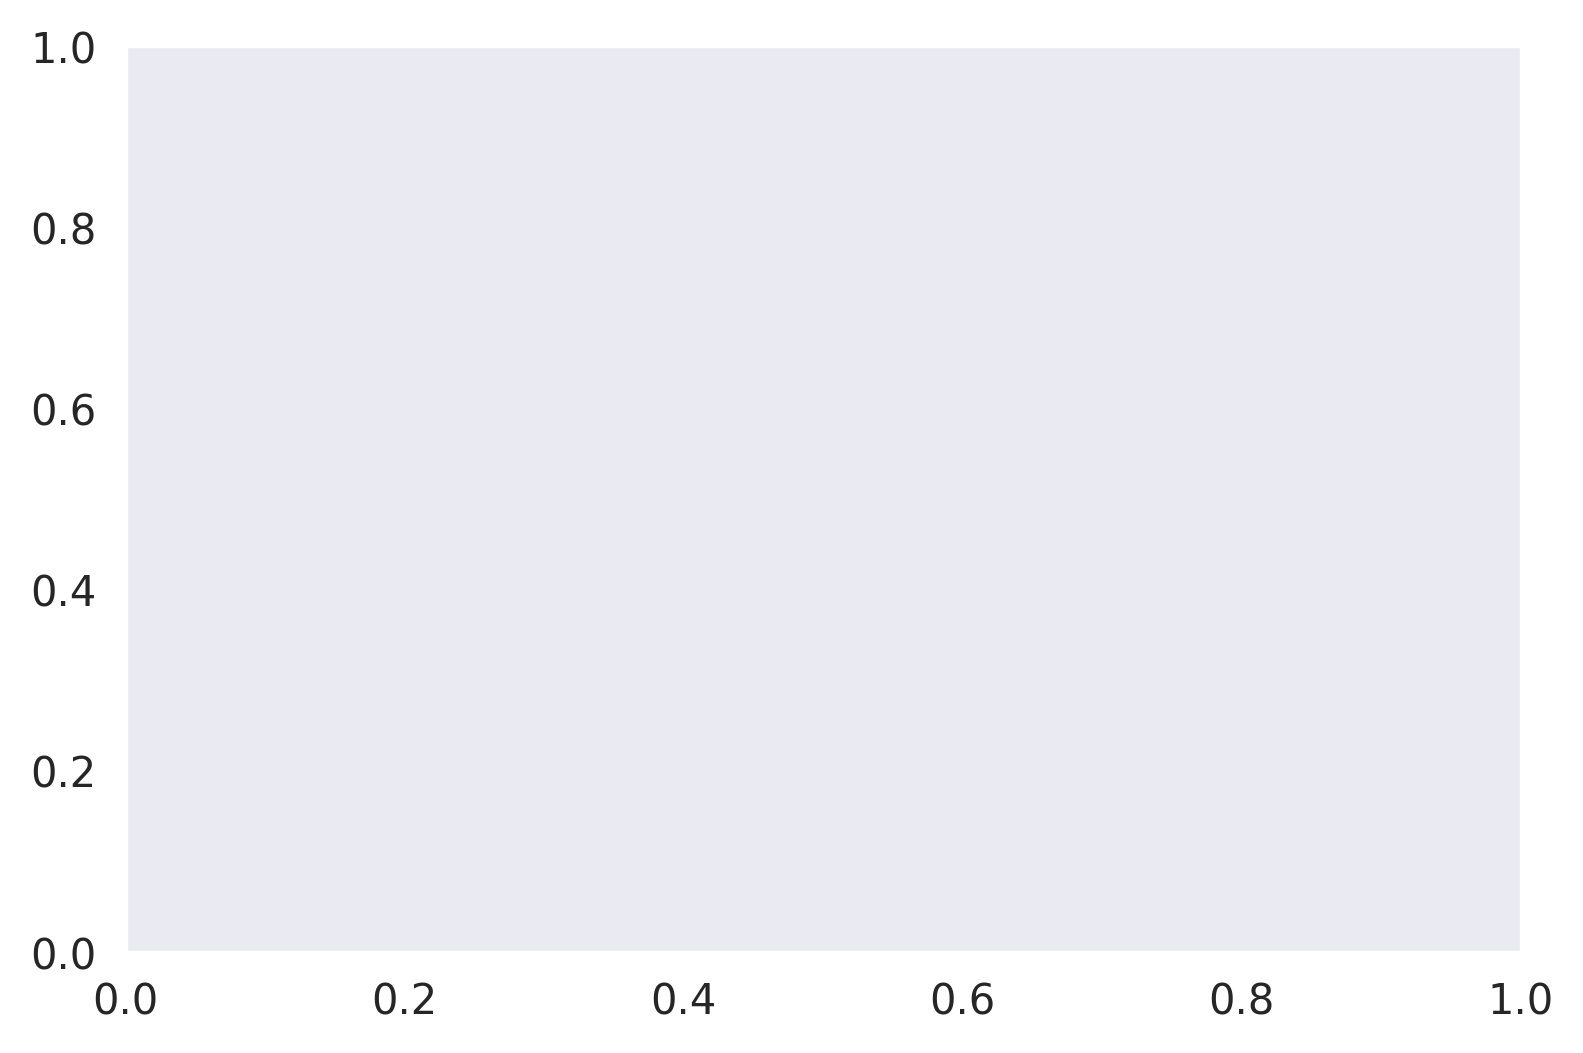

In [25]:
%run tools/analysis_tools/analyze_logs.py plot_curve swin_log.json --out map.png

<Figure size 432x288 with 0 Axes>

plot curve of swin_log.json, metric is loss_cls
plot curve of swin_log.json, metric is loss_bbox
save curve to: loss.png


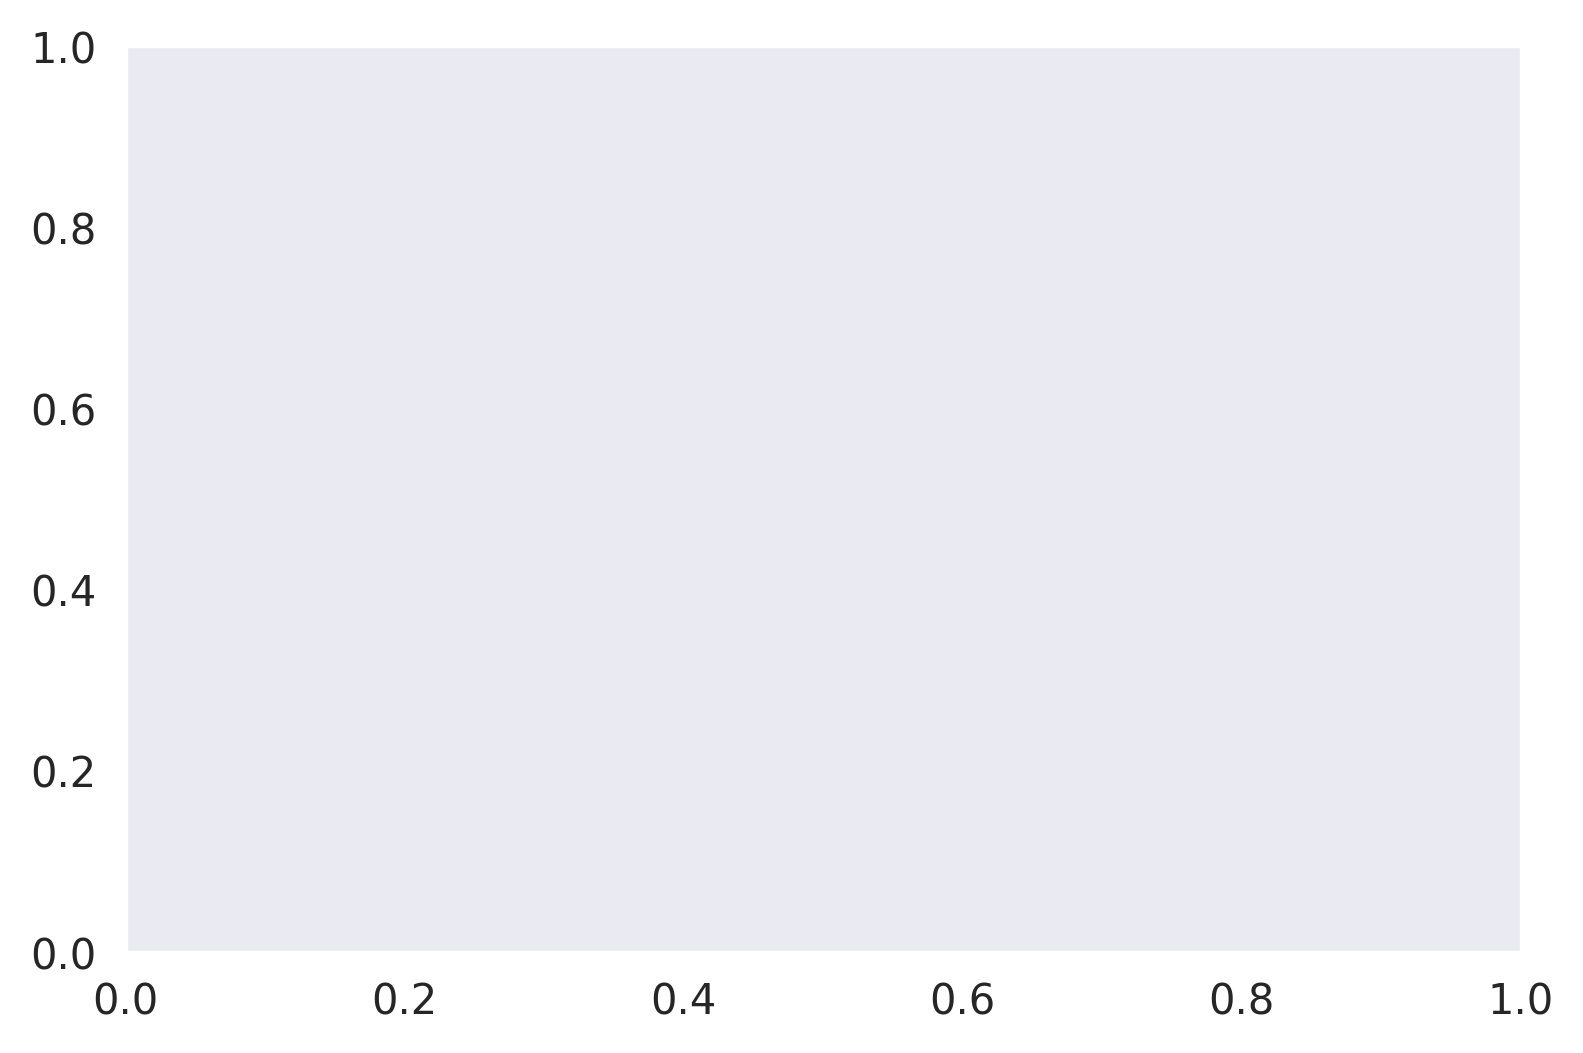

In [26]:
%run tools/analysis_tools/analyze_logs.py plot_curve swin_log.json --keys loss_cls loss_bbox --out loss.png


load checkpoint from local path: checkpoints/latest.pth


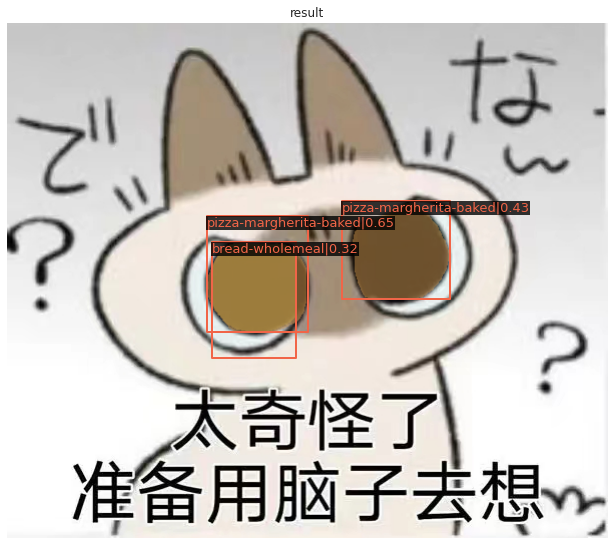

In [11]:
%run demo/image_demo.py demo/cat-1.jpg configs/food_recog/config_new_swin_top50.py checkpoints/latest.pth